# Mini-projet : classification de battements cardiaques

## Nom du binôme : EL AMRANI Wadie et RATABOUIL Guilhem

Cet ensemble de données a été créé à l'origine pour un défi d'apprentissage automatique visant à classer les bruits de battements cardiaques.

<img src="files/BattementCardiaque.PNG" width="600" height="300"  >

Les données ont été recueillies auprès de deux sources :
- (A) auprès du grand public via une application de smartphone,
- (B) dans le cadre d'un essai clinique dans des hôpitaux utilisant le stéthoscope numérique.


Les enregistrements de ces 2 sources étant de durées différentes, ils ont été ensuite transformés en MFCC pour extraire le contenu fréquentiel de ces données.


In [4]:
%cd /content/drive/MyDrive/M1_IAFA/Machine learning/MiniProjet2023_BattementCardiaque_VersionEtudiante/MiniProjet2023_BattementCardiaque_VersionEtudiante

/content/drive/MyDrive/M1_IAFA/Machine learning/MiniProjet2023_BattementCardiaque_VersionEtudiante/MiniProjet2023_BattementCardiaque_VersionEtudiante


In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import librosa
import IPython.display as ipd

import matplotlib.pyplot as plt
import sklearn
import math
from scipy import stats
#import seaborn as sns

## Exemples de sons de l'ensemble A de battements cardiaques à classer



In [8]:
# Son d'un battement normal
x0,sr0=librosa.load("normalA.wav",duration=5)
ipd.Audio(x0,rate=sr0)


In [9]:
# Son d'un murmure cardiaque

x1,sr1=librosa.load("murmurA.wav",duration=5)
ipd.Audio(x1,rate=sr1)

In [10]:
# Son d'un artefact
x3,sr3=librosa.load("artifactA.wav",duration=5)
ipd.Audio(x3,rate=sr3)

## Exemples de sons de l'ensemble B de battements cardiaques à classer



In [11]:
# Son d'un battement normal - ensemble B
x4,sr4=librosa.load("normalB.wav",duration=5)
ipd.Audio(x4,rate=sr4)


In [12]:
# Son d'un murmure cardiaque - ensemble B

x5,sr5=librosa.load("murmurB.wav",duration=5)
ipd.Audio(x5,rate=sr5)

## Chargement des données

A chaque enregistrement, 20 coefficients MFCC sont calculés en réalisant la moyenne sur chaque fenêtre de 10ms.

*DataMFCC.csv* regroupe tous les enregistrements des 2 dispositifs.

Le fichier source *DataMFCC.csv* sur lequel vous travaillez est la conversion des enregistrements audio en matrice de paramètres appélés MFCC (Mel Frequency Cepstral Coefficient) en utilisant la librairie python *librosa*. Ces paramètres permettent d'extraire au mieux le contenu vocal fréquenciel du signal audio.

La matrice de données est composée d'autant de vecteurs lignes que de fichiers audio. Le nombre de colonnes correspond à la dimension du vecteur moyen représentatif des MFCC : ici 20.

In [13]:
data = pd.read_csv('DataMFCC.csv')

data.head()

mfcc0      mfcc1      mfcc2      mfcc3      mfcc4      mfcc5  \
0 -489.62180   70.23919  61.142830  48.898050  36.555330  26.469486   
1 -406.42853  153.23886  -1.369525  16.263828  10.937109  16.939487   
2 -511.58224   82.09152   6.478385  35.782322   4.926917  23.501286   
3 -514.13293   78.29218  65.463070  49.305313  34.505836  23.954039   
4 -371.67172  155.28653  35.827470  19.501045  37.935867  34.704395   

       mfcc6      mfcc7      mfcc8      mfcc9  ...     mfcc11    mfcc12  \
0  19.623278  15.663741  13.472218  11.869776  ...   8.004507  5.803412   
1   4.494656   6.633343   6.228123   3.696192  ...  -2.162616 -0.629793   
2   2.172139  16.772097  -0.364136  12.615507  ...  10.425499 -2.136471   
3  18.073490  15.343872  13.722630  11.918728  ...   7.061982  4.627193   
4  17.897236   9.181622  10.555704  10.437612  ...  -0.750443  2.518559   

     mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18    mfcc19  \
0  3.905093  2.625853  2.056817  2.049077  2.306891  2.535396  2.566249   
1 -0.598225 -1.809965 -2.767086 -3.141027 -3.952870 -3.527147 -4.081270   
2  6.526673 -2.714465  4.534374 -2.864164  2.395745 -2.710135  1.320221   
3  2.702706  1.549387  1.235011  1.578198  2.168477  2.570371  2.564390   
4  6.119143  1.359976 -3.627311 -3.266012  0.071095  0.160198 -1.439477   

    label  
0  normal  
1  normal  
2  normal  
3  normal  
4  normal  

[5 rows x 21 columns]

In [14]:
data["label"].value_counts()

normal      351
murmur      129
artifact     40
Name: label, dtype: int64

In [15]:
X=data.iloc[:,0:20]
X.head()

mfcc0      mfcc1      mfcc2      mfcc3      mfcc4      mfcc5  \
0 -489.62180   70.23919  61.142830  48.898050  36.555330  26.469486   
1 -406.42853  153.23886  -1.369525  16.263828  10.937109  16.939487   
2 -511.58224   82.09152   6.478385  35.782322   4.926917  23.501286   
3 -514.13293   78.29218  65.463070  49.305313  34.505836  23.954039   
4 -371.67172  155.28653  35.827470  19.501045  37.935867  34.704395   

       mfcc6      mfcc7      mfcc8      mfcc9     mfcc10     mfcc11    mfcc12  \
0  19.623278  15.663741  13.472218  11.869776  10.107503   8.004507  5.803412   
1   4.494656   6.633343   6.228123   3.696192  -3.058978  -2.162616 -0.629793   
2   2.172139  16.772097  -0.364136  12.615507  -1.403247  10.425499 -2.136471   
3  18.073490  15.343872  13.722630  11.918728   9.623236   7.061982  4.627193   
4  17.897236   9.181622  10.555704  10.437612   2.700969  -0.750443  2.518559   

     mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18    mfcc19  
0  3.905093  2.625853  2.056817  2.049077  2.306891  2.535396  2.566249  
1 -0.598225 -1.809965 -2.767086 -3.141027 -3.952870 -3.527147 -4.081270  
2  6.526673 -2.714465  4.534374 -2.864164  2.395745 -2.710135  1.320221  
3  2.702706  1.549387  1.235011  1.578198  2.168477  2.570371  2.564390  
4  6.119143  1.359976 -3.627311 -3.266012  0.071095  0.160198 -1.439477

In [17]:
from sklearn.preprocessing import LabelEncoder
# Encode le label de chaque classe par un chiffre
ylabel=data["label"]
le=LabelEncoder().fit(ylabel)
y=le.transform(ylabel)

print('Label',ylabel[40],'correspond au numero',y[40])
print('Label',ylabel[0],'correspond au numero',y[0])
print('Label',ylabel[100],'correspond au numero',y[100])


Label artifact correspond au numero 0
Label normal correspond au numero 2
Label murmur correspond au numero 1


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=31,stratify=y)

print("Base d'apprentissage SET A- XA_Train: ",len(X_train),"\n","Base de test - XA_Test: ",len(X_test),sep="")

Base d'apprentissage SET A- XA_Train: 390
Base de test - XA_Test: 130


In [19]:
# Description de l'ensemble d'apprentissage
values,count=np.unique(y_train, return_counts=True)

print('label:',values,'nbre de valeurs:',count )

label: [0 1 2] nbre de valeurs: [ 30  97 263]


In [20]:
# Création d'un dictionnaire pour mapper les labels textuels aux numéros
label_dict = {
    "artifact": 0,
    "normal": 2,
    "murmur": 1
}

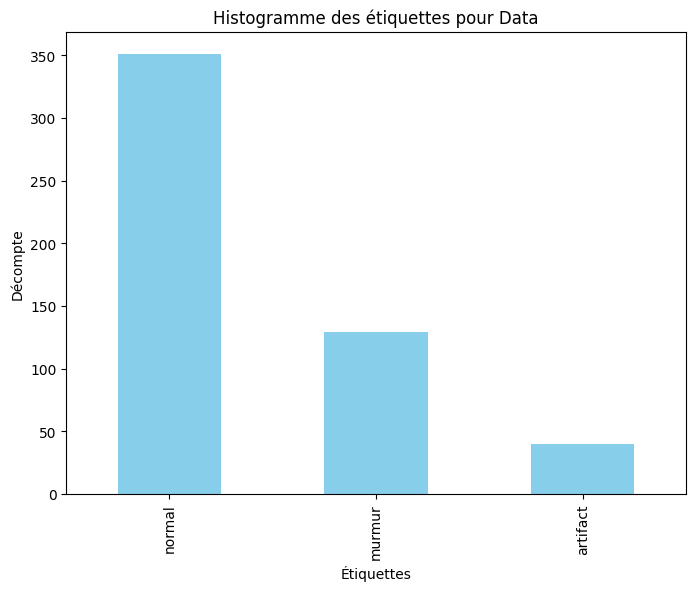

In [21]:
import matplotlib.pyplot as plt

# Données Data
plt.figure(figsize=(8, 6))
data["label"].value_counts().plot(kind='bar', color='skyblue')
plt.title("Histogramme des étiquettes pour Data")
plt.xlabel("Étiquettes")
plt.ylabel("Décompte")
plt.show()


**DataMFCC_setA**

In [22]:
data_A = pd.read_csv('DataMFCC_setA.csv')

data_A.head()

mfcc0      mfcc1      mfcc2      mfcc3      mfcc4      mfcc5  \
0 -489.62180   70.23919  61.142830  48.898050  36.555330  26.469486   
1 -406.42853  153.23886  -1.369525  16.263828  10.937109  16.939487   
2 -511.58224   82.09152   6.478385  35.782322   4.926917  23.501286   
3 -514.13293   78.29218  65.463070  49.305313  34.505836  23.954039   
4 -371.67172  155.28653  35.827470  19.501045  37.935867  34.704395   

       mfcc6      mfcc7      mfcc8      mfcc9  ...     mfcc11    mfcc12  \
0  19.623278  15.663741  13.472218  11.869776  ...   8.004507  5.803412   
1   4.494656   6.633343   6.228123   3.696192  ...  -2.162616 -0.629793   
2   2.172139  16.772097  -0.364136  12.615507  ...  10.425499 -2.136471   
3  18.073490  15.343872  13.722630  11.918728  ...   7.061982  4.627193   
4  17.897236   9.181622  10.555704  10.437612  ...  -0.750443  2.518559   

     mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18    mfcc19  \
0  3.905093  2.625853  2.056817  2.049077  2.306891  2.535396  2.566249   
1 -0.598225 -1.809965 -2.767086 -3.141027 -3.952870 -3.527147 -4.081270   
2  6.526673 -2.714465  4.534374 -2.864164  2.395745 -2.710135  1.320221   
3  2.702706  1.549387  1.235011  1.578198  2.168477  2.570371  2.564390   
4  6.119143  1.359976 -3.627311 -3.266012  0.071095  0.160198 -1.439477   

    label  
0  normal  
1  normal  
2  normal  
3  normal  
4  normal  

[5 rows x 21 columns]

In [23]:
data_A["label"].value_counts()

artifact    40
murmur      34
normal      31
Name: label, dtype: int64

In [24]:
XA=data_A.iloc[:,0:20]
XA.head()

mfcc0      mfcc1      mfcc2      mfcc3      mfcc4      mfcc5  \
0 -489.62180   70.23919  61.142830  48.898050  36.555330  26.469486   
1 -406.42853  153.23886  -1.369525  16.263828  10.937109  16.939487   
2 -511.58224   82.09152   6.478385  35.782322   4.926917  23.501286   
3 -514.13293   78.29218  65.463070  49.305313  34.505836  23.954039   
4 -371.67172  155.28653  35.827470  19.501045  37.935867  34.704395   

       mfcc6      mfcc7      mfcc8      mfcc9     mfcc10     mfcc11    mfcc12  \
0  19.623278  15.663741  13.472218  11.869776  10.107503   8.004507  5.803412   
1   4.494656   6.633343   6.228123   3.696192  -3.058978  -2.162616 -0.629793   
2   2.172139  16.772097  -0.364136  12.615507  -1.403247  10.425499 -2.136471   
3  18.073490  15.343872  13.722630  11.918728   9.623236   7.061982  4.627193   
4  17.897236   9.181622  10.555704  10.437612   2.700969  -0.750443  2.518559   

     mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18    mfcc19  
0  3.905093  2.625853  2.056817  2.049077  2.306891  2.535396  2.566249  
1 -0.598225 -1.809965 -2.767086 -3.141027 -3.952870 -3.527147 -4.081270  
2  6.526673 -2.714465  4.534374 -2.864164  2.395745 -2.710135  1.320221  
3  2.702706  1.549387  1.235011  1.578198  2.168477  2.570371  2.564390  
4  6.119143  1.359976 -3.627311 -3.266012  0.071095  0.160198 -1.439477

In [25]:
from sklearn.preprocessing import LabelEncoder

# Encode le label de chaque classe par un chiffre
ylabelA=data_A["label"]
le=LabelEncoder().fit(ylabelA)
yA=le.transform(ylabelA)

print('Label',ylabelA[40],'correspond au numero',yA[40])
print('Label',ylabelA[0],'correspond au numero',yA[0])
print('Label',ylabelA[100],'correspond au numero',yA[100])

Label artifact correspond au numero 0
Label normal correspond au numero 2
Label murmur correspond au numero 1


In [26]:
XA_train,XA_test,yA_train,yA_test=train_test_split(XA,yA,test_size=0.25,random_state=31,stratify=yA)

print("Base d'apprentissage SET A- XA_Train: ",len(XA_train),"\n","Base de test - XA_Test: ",len(XA_test),sep="")

Base d'apprentissage SET A- XA_Train: 78
Base de test - XA_Test: 27


In [27]:
# Description de l'ensemble d'apprentissage
values,count=np.unique(yA_train, return_counts=True)

print('label:',values,'nbre de valeurs:',count )

label: [0 1 2] nbre de valeurs: [30 25 23]


In [28]:
# Création d'un dictionnaire pour mapper les labels textuels aux numéros
label_dictA = {
    "artifact": 0,
    "normal": 2,
    "murmur": 1
}

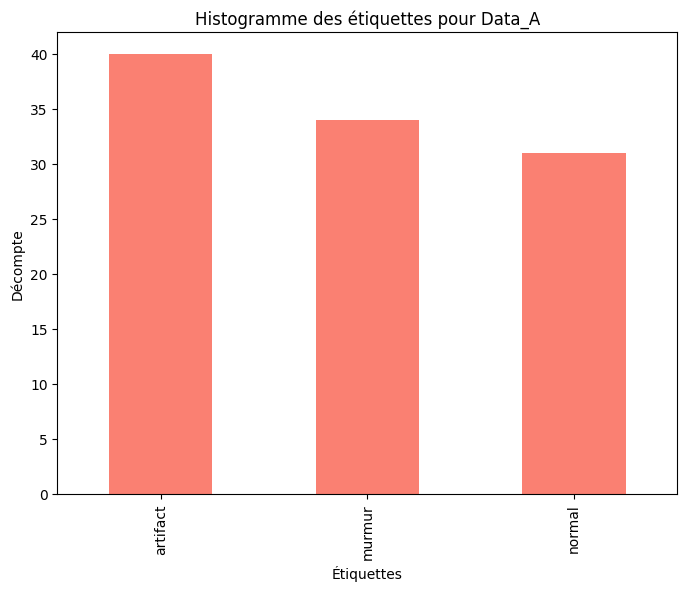

In [29]:
# Données Data_A
plt.figure(figsize=(8, 6))
data_A["label"].value_counts().plot(kind='bar', color='salmon')
plt.title("Histogramme des étiquettes pour Data_A")
plt.xlabel("Étiquettes")
plt.ylabel("Décompte")
plt.show()

**DataMFCC_setB**

In [30]:
data_B = pd.read_csv('DataMFCC_setB.csv')

data_B.head()

mfcc0      mfcc1      mfcc2      mfcc3      mfcc4      mfcc5  \
0 -418.09332  175.73813  69.980830   2.377561   2.774788  24.894330   
1 -397.18332  186.58752  59.139065 -13.108131   1.004456  33.355938   
2 -447.88007  242.61023  49.116230 -42.743694  -1.734100  49.038624   
3 -392.76746  202.49107  47.322800 -36.127080 -11.311083  35.152554   
4 -448.57916  231.21805  70.558720 -19.407766  -2.860076  33.591840   

       mfcc6      mfcc7      mfcc8      mfcc9  ...     mfcc11     mfcc12  \
0  22.562020   3.636683  -0.387201  12.654119  ...   6.686438  -4.225369   
1  24.903528  -5.619292 -11.694646   7.736064  ...   5.731157  -5.203340   
2  27.660511 -16.530268 -15.337034  12.334559  ... -10.696369 -15.007415   
3  30.396927  -3.019543 -11.217678   6.340012  ...   1.439934  -4.486096   
4  21.030445 -13.256731 -15.409655   9.322534  ...   3.884828  -5.328600   

     mfcc13     mfcc14    mfcc15    mfcc16    mfcc17     mfcc18    mfcc19  \
0 -0.368776   8.671393  8.072885  0.859806 -0.255969   5.410184  7.189406   
1  0.763680  10.507512  8.178871 -0.053015 -0.269063   5.925370  7.038307   
2  4.421076  13.739329  2.077248 -5.846045  2.810562  10.235391  3.320168   
3  5.049971  11.483684  3.629767 -4.715653 -0.731561   7.120511  6.155967   
4  3.251087   9.859106  2.102492 -4.922160  2.199625  12.033491  8.988011   

    label  
0  normal  
1  normal  
2  normal  
3  normal  
4  normal  

[5 rows x 21 columns]

In [31]:
data_B["label"].value_counts()

normal    320
murmur     95
Name: label, dtype: int64

In [32]:
XB=data_B.iloc[:,0:20]
XB.head()

mfcc0      mfcc1      mfcc2      mfcc3      mfcc4      mfcc5  \
0 -418.09332  175.73813  69.980830   2.377561   2.774788  24.894330   
1 -397.18332  186.58752  59.139065 -13.108131   1.004456  33.355938   
2 -447.88007  242.61023  49.116230 -42.743694  -1.734100  49.038624   
3 -392.76746  202.49107  47.322800 -36.127080 -11.311083  35.152554   
4 -448.57916  231.21805  70.558720 -19.407766  -2.860076  33.591840   

       mfcc6      mfcc7      mfcc8      mfcc9     mfcc10     mfcc11  \
0  22.562020   3.636683  -0.387201  12.654119  18.174608   6.686438   
1  24.903528  -5.619292 -11.694646   7.736064  17.631987   5.731157   
2  27.660511 -16.530268 -15.337034  12.334559  12.605898 -10.696369   
3  30.396927  -3.019543 -11.217678   6.340012  13.259340   1.439934   
4  21.030445 -13.256731 -15.409655   9.322534  18.504864   3.884828   

      mfcc12    mfcc13     mfcc14    mfcc15    mfcc16    mfcc17     mfcc18  \
0  -4.225369 -0.368776   8.671393  8.072885  0.859806 -0.255969   5.410184   
1  -5.203340  0.763680  10.507512  8.178871 -0.053015 -0.269063   5.925370   
2 -15.007415  4.421076  13.739329  2.077248 -5.846045  2.810562  10.235391   
3  -4.486096  5.049971  11.483684  3.629767 -4.715653 -0.731561   7.120511   
4  -5.328600  3.251087   9.859106  2.102492 -4.922160  2.199625  12.033491   

     mfcc19  
0  7.189406  
1  7.038307  
2  3.320168  
3  6.155967  
4  8.988011

In [33]:
from sklearn.preprocessing import LabelEncoder

# Encode le label de chaque classe par un chiffre
ylabelB=data_B["label"]
le=LabelEncoder().fit(ylabelB)
yB=le.transform(ylabelB)

print('Label',ylabelB[60],'correspond au numero',yB[40])

Label normal correspond au numero 1


In [34]:
XB_train,XB_test,yB_train,yB_test=train_test_split(XB,yB,test_size=0.25,random_state=31,stratify=yB)

print("Base d'apprentissage - X_Train: ",len(XB_train),"\n","Base de test - X_Test: ",len(XB_test),sep="")

Base d'apprentissage - X_Train: 311
Base de test - X_Test: 104


In [35]:
# Description de l'ensemble d'apprentissage
values,count=np.unique(yB_train, return_counts=True)

print('label:',values,'nbre de valeurs:',count )

label: [0 1] nbre de valeurs: [ 71 240]


In [36]:
# Création d'un dictionnaire pour mapper les labels textuels aux numéros
label_dictB = {
    "normal": 1,
    "murmur": 0
}

# **Recaputilatif des datasets**

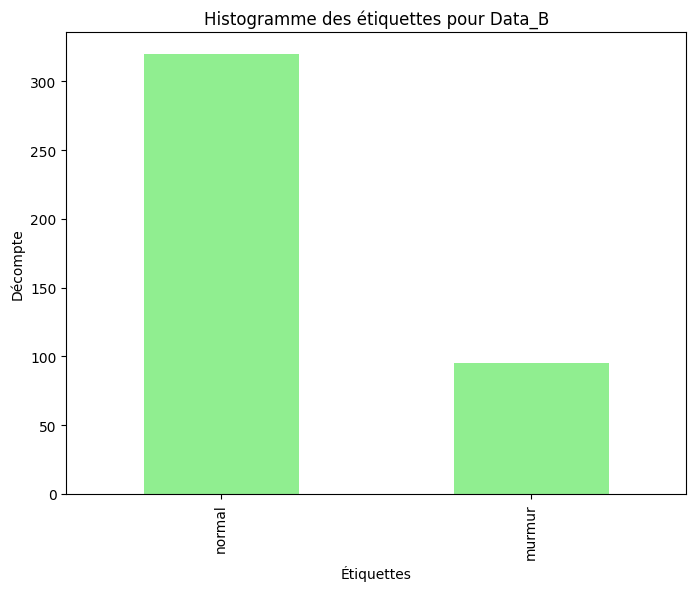

In [ ]:
# Données Data_B
plt.figure(figsize=(8, 6))
data_B["label"].value_counts().plot(kind='bar', color='lightgreen')
plt.title("Histogramme des étiquettes pour Data_B")
plt.xlabel("Étiquettes")
plt.ylabel("Décompte")
plt.show()


# **Analyse**

### Fonctions pour réaliser une table de correspondance entre le label des approches non supervisées et le label réel

In [ ]:
def retrieve_info(cluster_labels,y_train):
 #Associe l'étiquette la plus probable à chaque groupe dans le modèle KMeans.
 #Résultats : dictionnaire des clusters associés à chaque étiquette.

# Initialisation
  reference_labels = np.zeros((len(np.unique(cluster_labels)),1))
# Loop pour chaque label
  for i in range(len(np.unique(cluster_labels))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

def correspondance(y_pred_kmeans,y_train):
  # Correspondance entre la partition et les classes de la vérité terrain
  reference_labels = retrieve_info(y_pred_kmeans,y_train)
  number_labels = np.zeros(len(y_pred_kmeans))
  for i in range(len(y_pred_kmeans)):
    number_labels[i] = reference_labels[y_pred_kmeans[i]]
  return number_labels

EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Statistiques descriptives des données:")
print(data.describe())

# Distribution des classes
print("\nDistribution des classes:")
print(data['label'].value_counts())

Statistiques descriptives des données:
             mfcc0       mfcc1       mfcc2       mfcc3       mfcc4  \
count   520.000000  520.000000  520.000000  520.000000  520.000000   
mean   -402.936275  171.576008   54.696070   -2.490263    1.034554   
std      95.348240   49.182907   26.470911   23.154230   13.205461   
min   -1081.043300  -29.527248  -72.262596  -53.103825  -28.883732   
25%    -443.332795  156.084563   53.144026  -18.204156   -5.908226   
50%    -401.399705  179.759370   62.886970   -4.510548   -0.281301   
75%    -362.938595  201.546010   69.022215    7.492512    5.206328   
max     130.121480  271.676330   91.316150   62.930397   48.075516   

            mfcc5       mfcc6       mfcc7       mfcc8       mfcc9      mfcc10  \
count  520.000000  520.000000  520.000000  520.000000  520.000000  520.000000   
mean    27.069048   20.499840    2.344616   -3.362874   10.765391   13.440328   
std      9.936994   12.649183    9.353119    8.605052    6.391949   10.060241   
min   

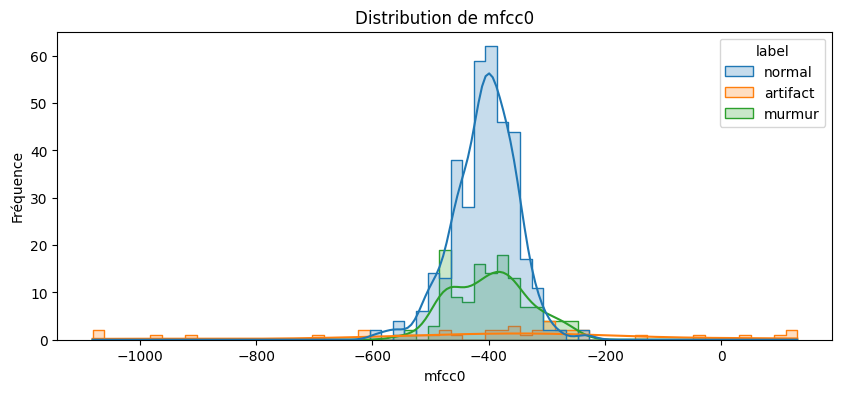

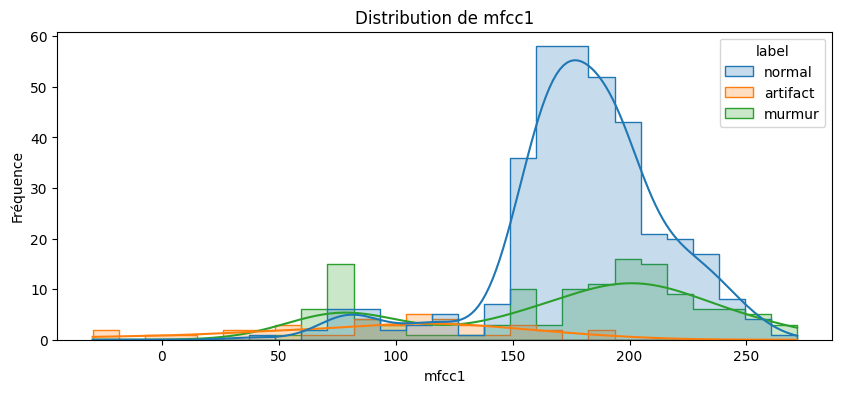

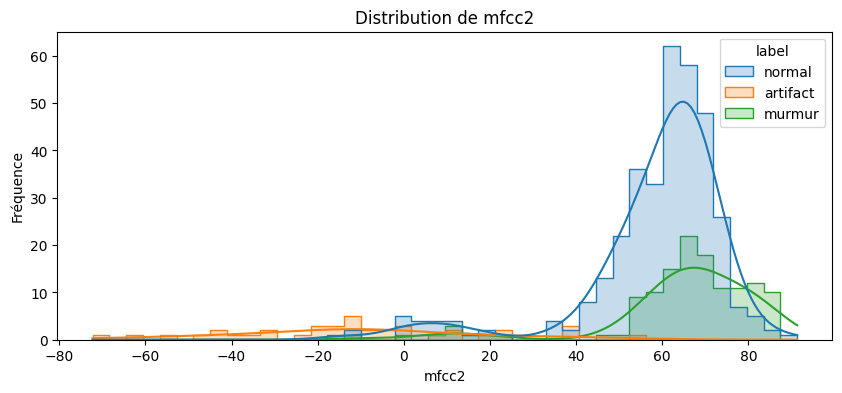

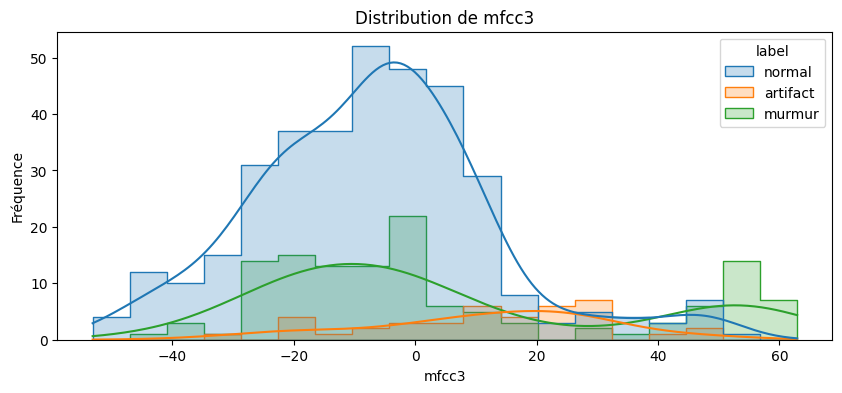

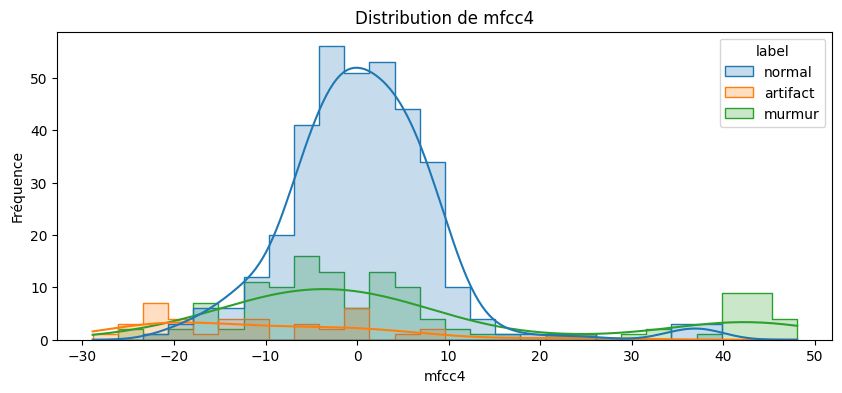

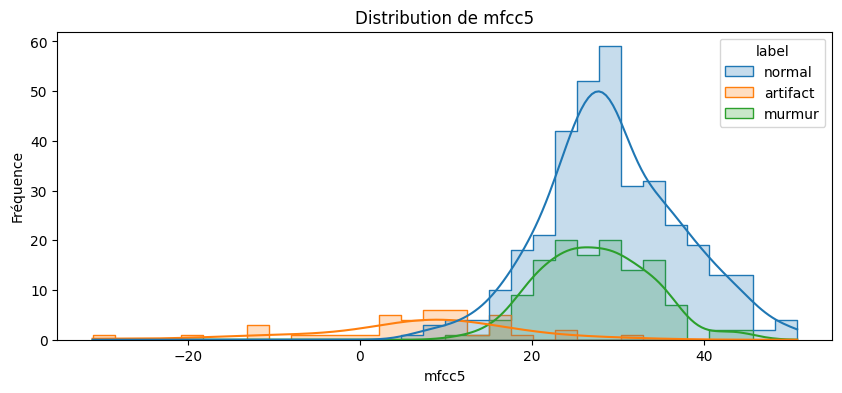

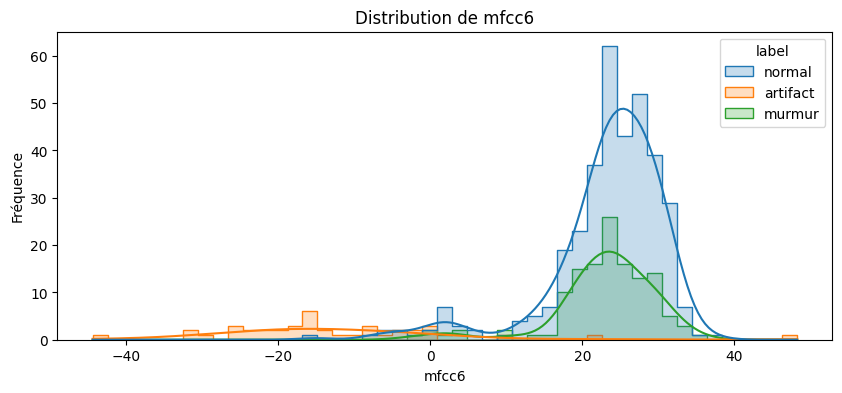

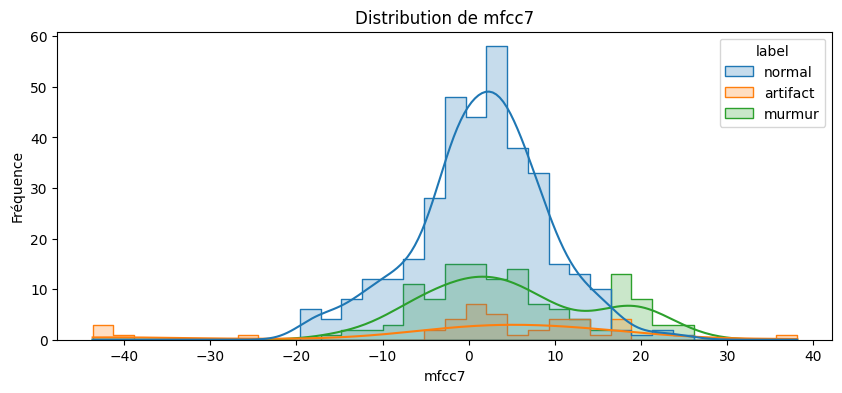

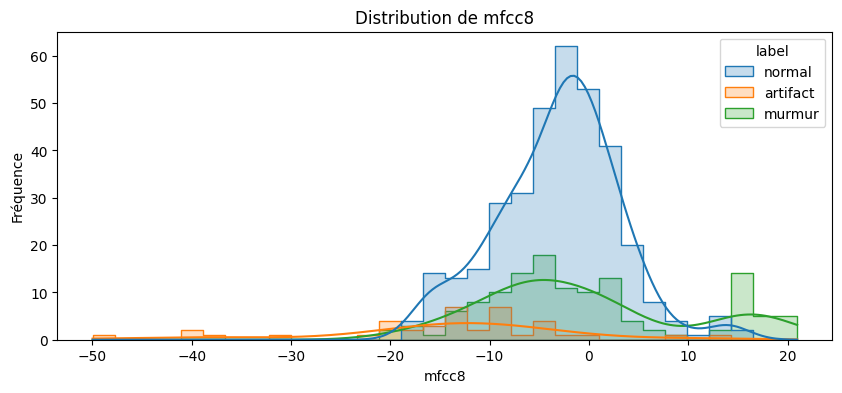

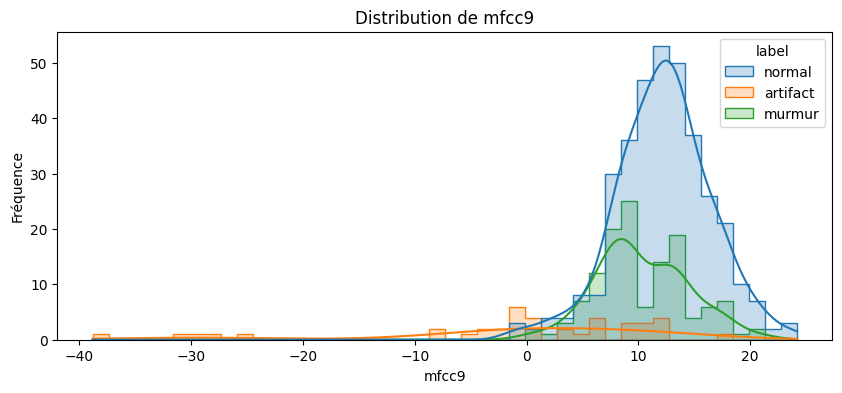

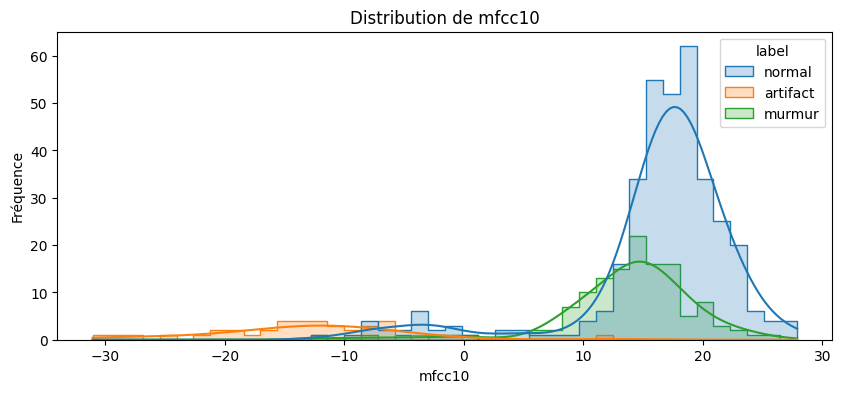

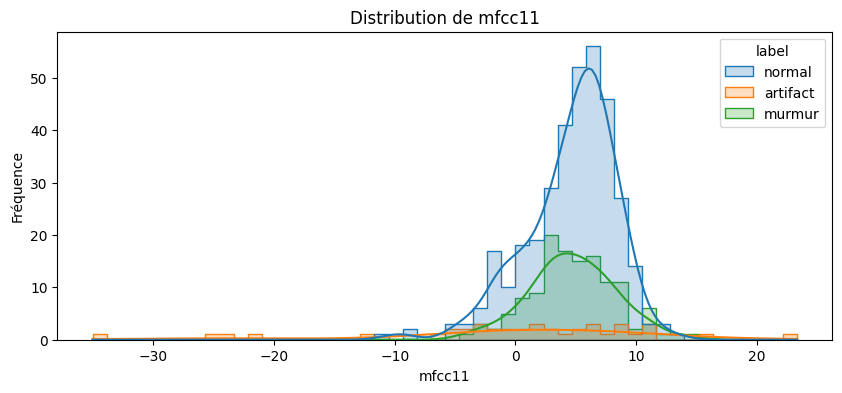

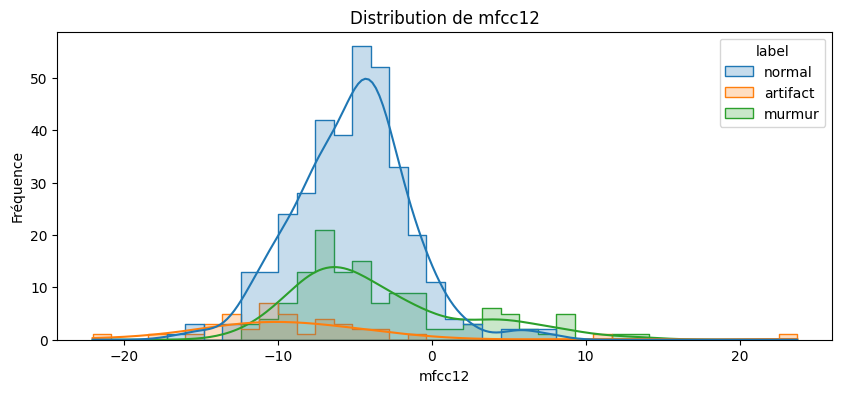

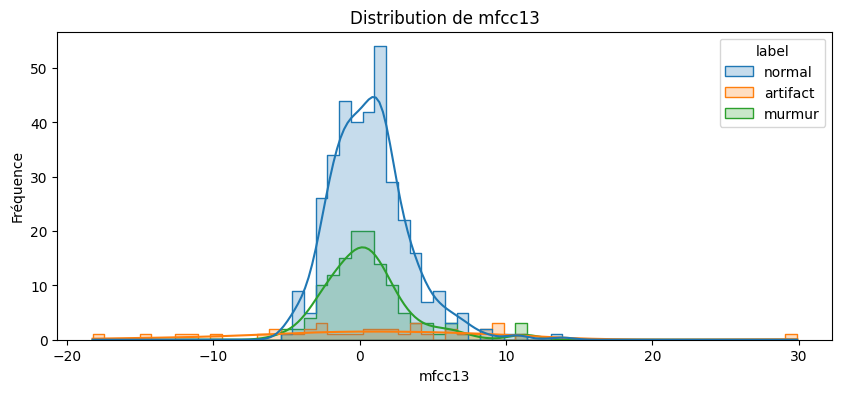

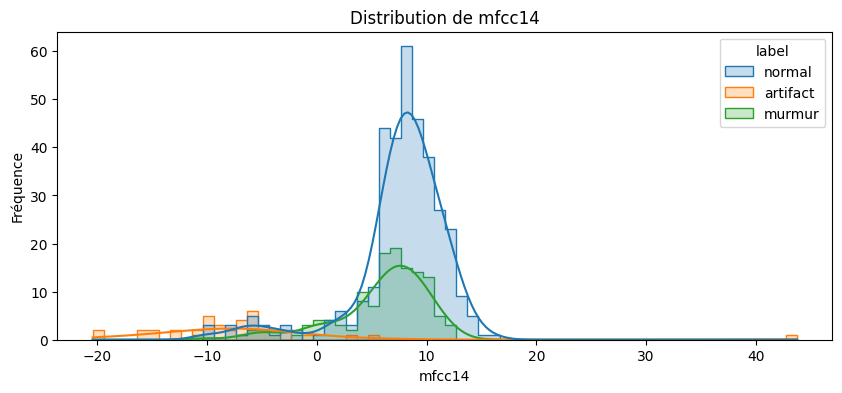

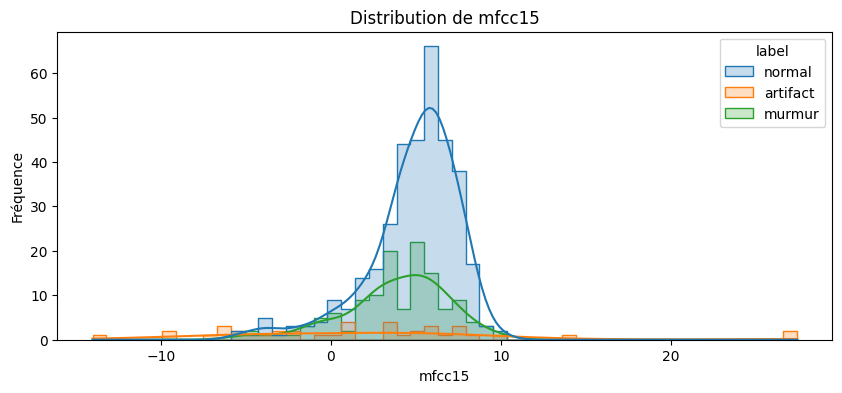

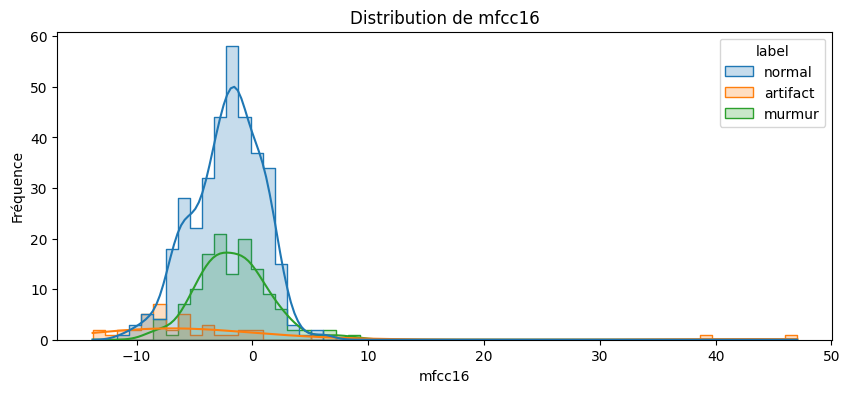

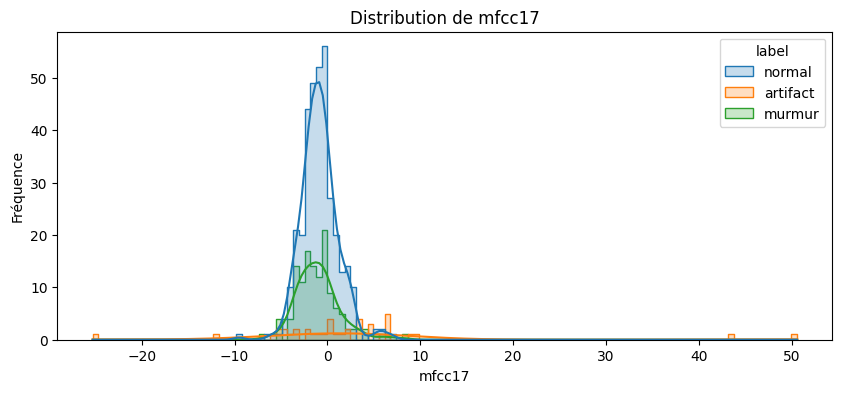

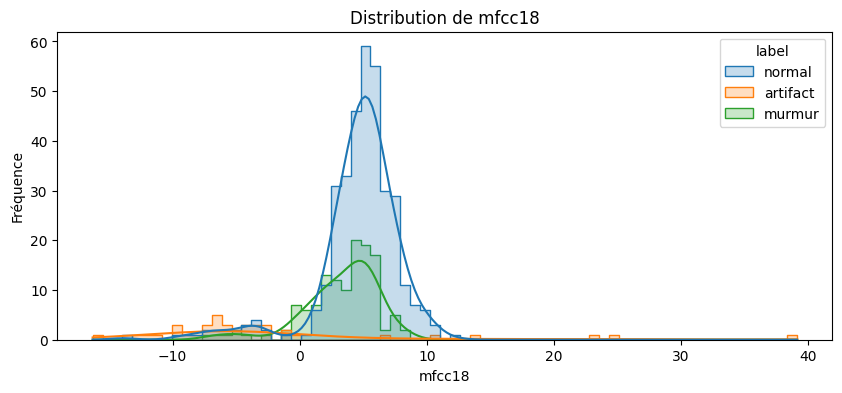

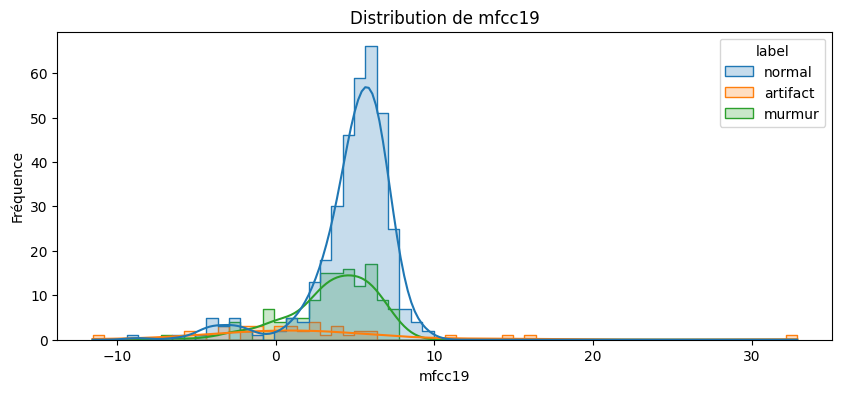

In [ ]:
# Histogrammes pour chaque coefficient MFCC
features = [col for col in data.columns if col.startswith('mfcc')]
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=data, x=feature, hue='label', element='step', kde=True)
    plt.title(f'Distribution de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Fréquence')
    plt.show()

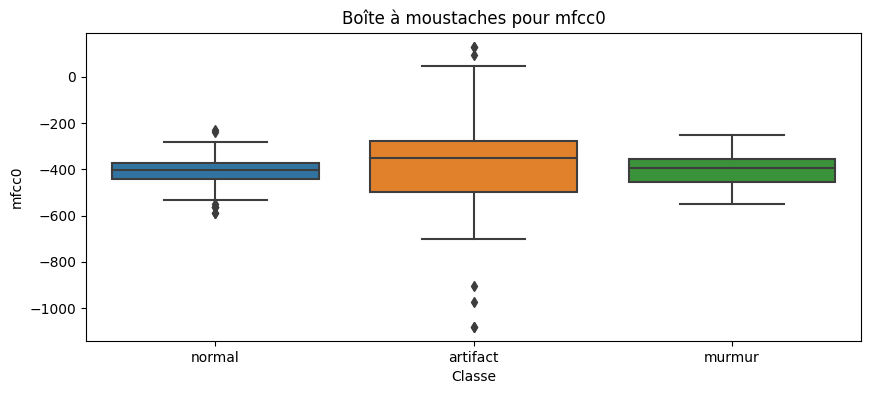

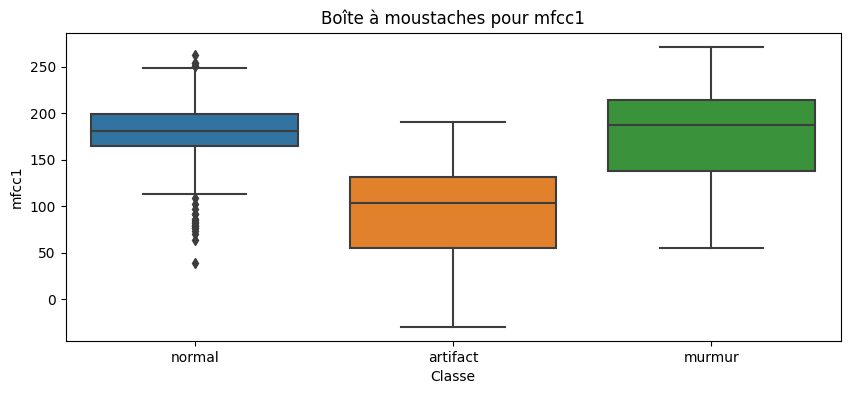

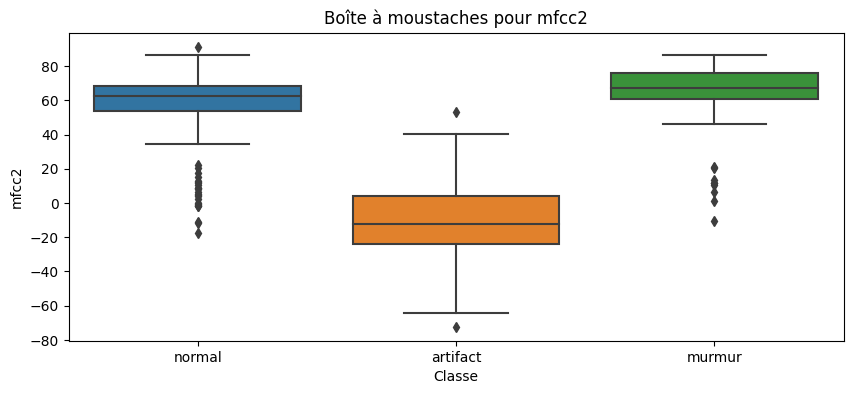

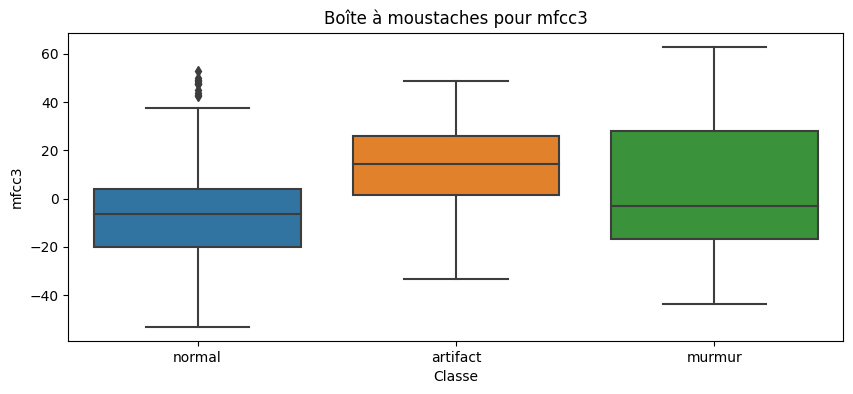

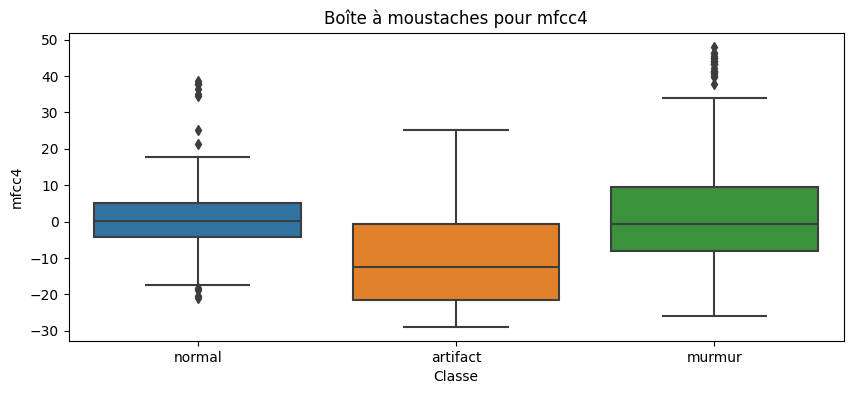

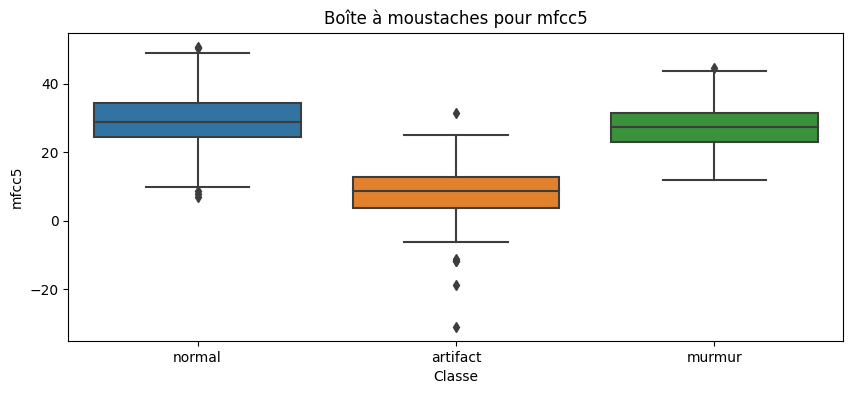

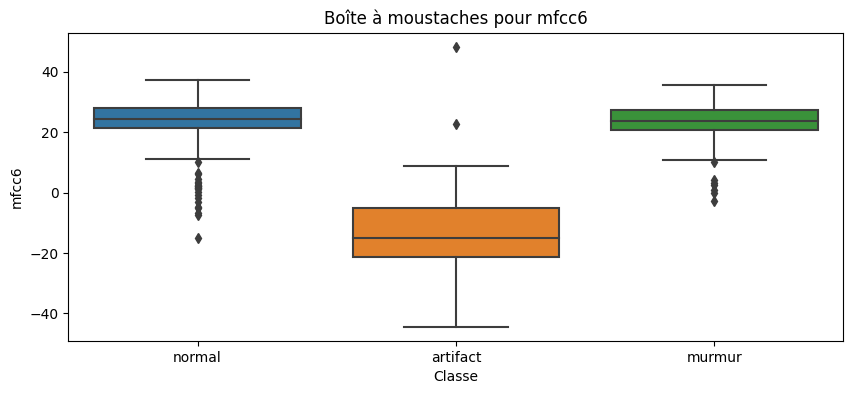

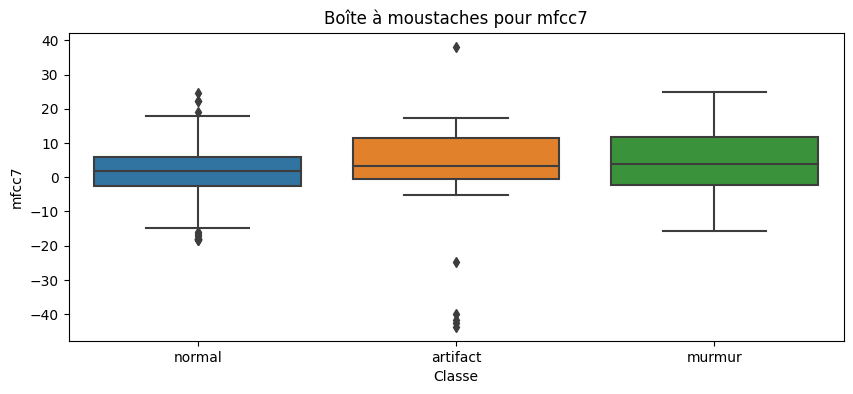

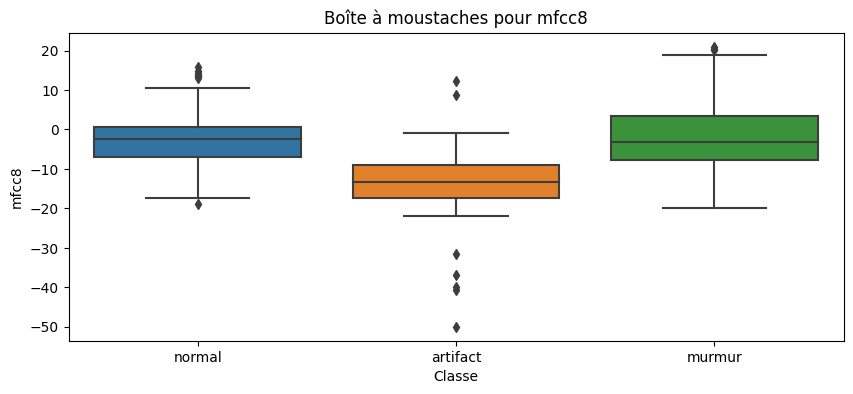

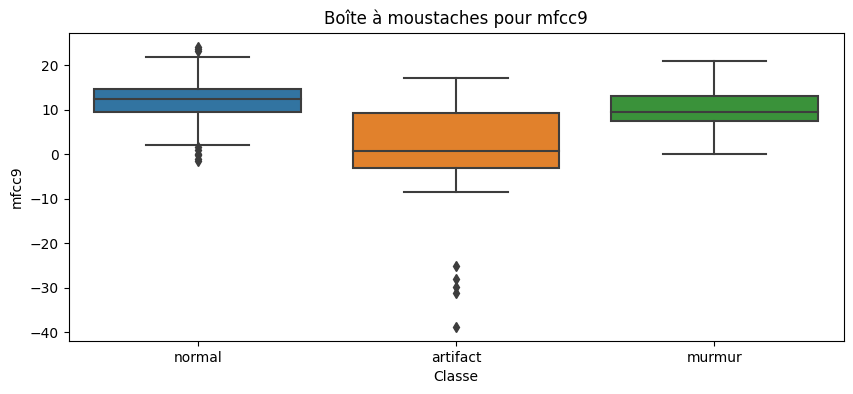

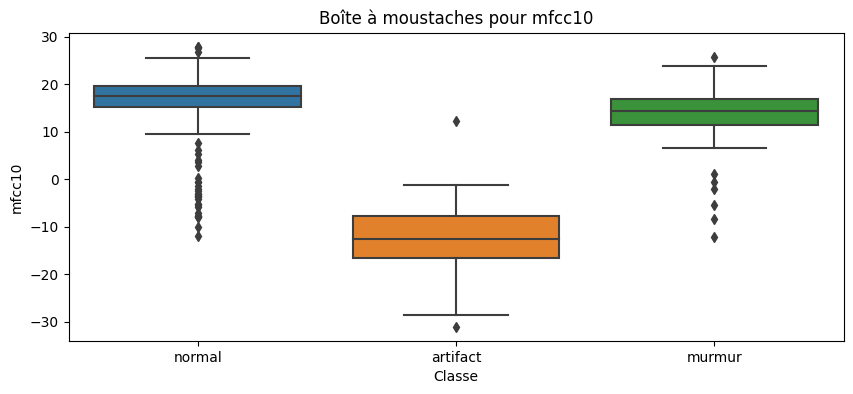

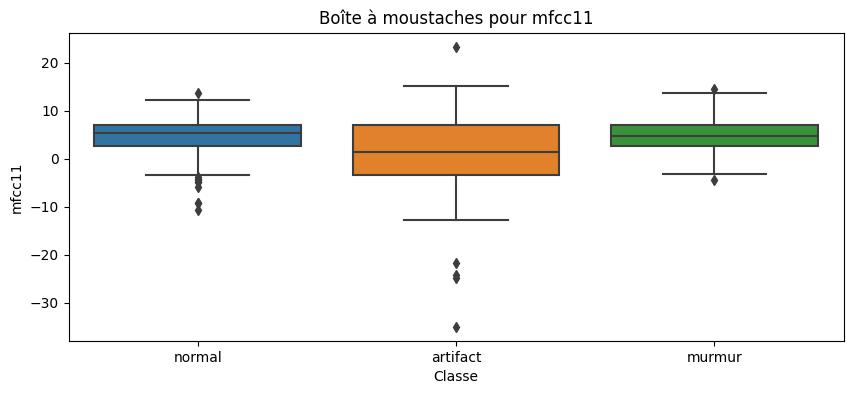

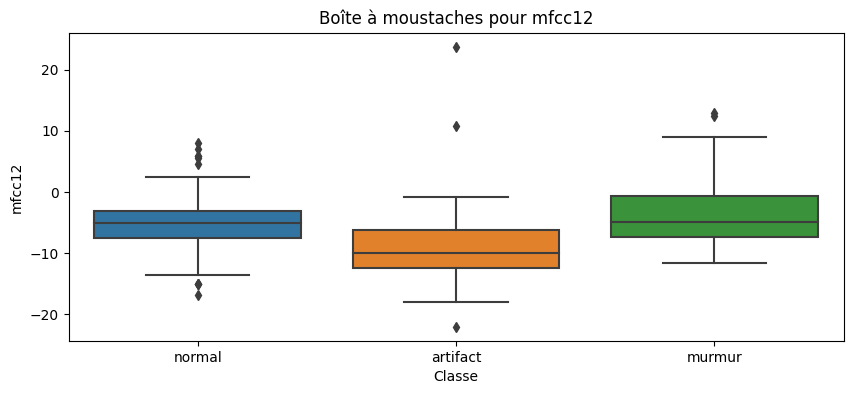

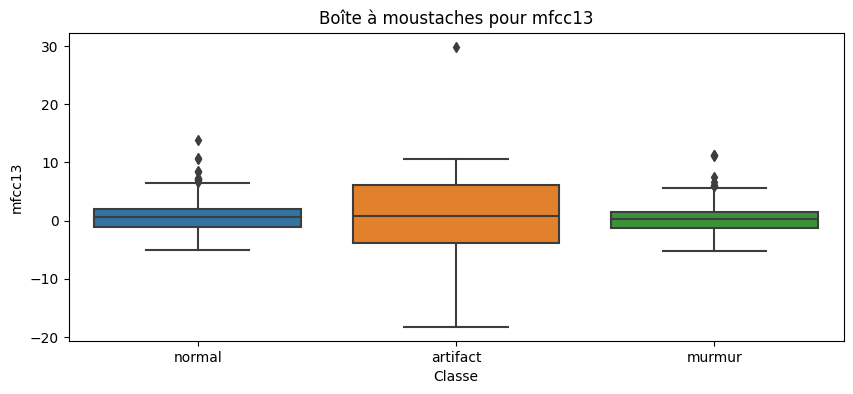

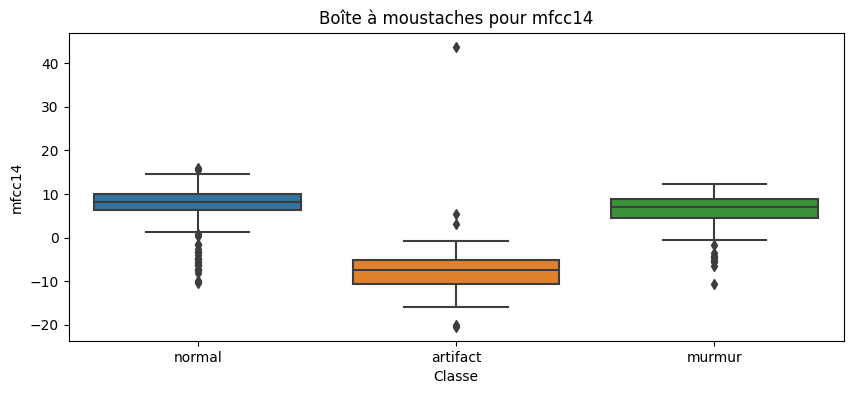

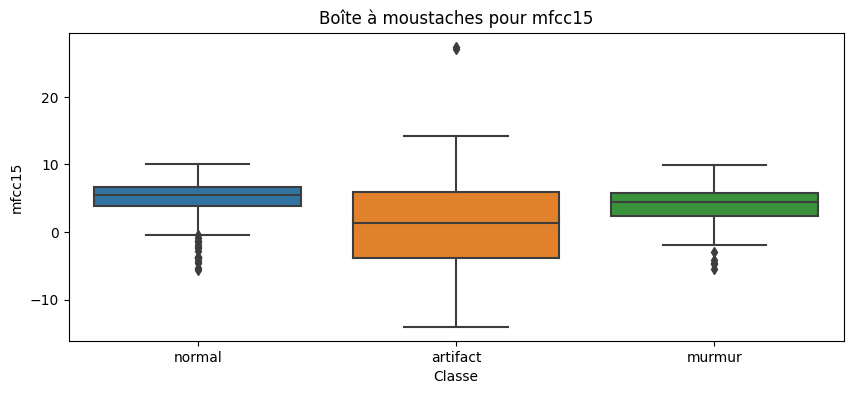

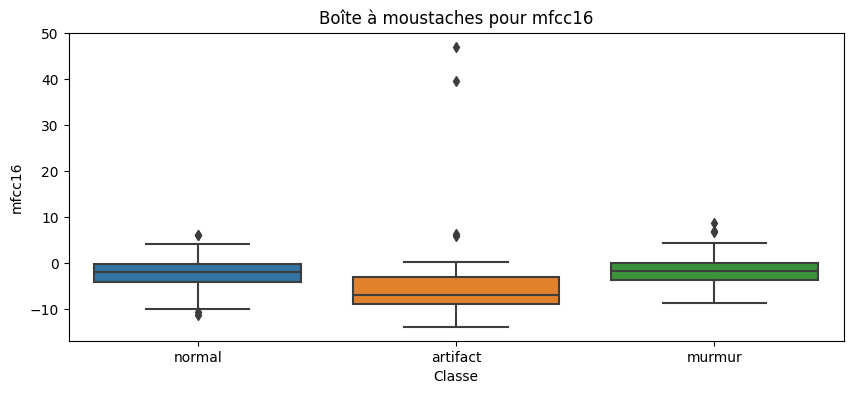

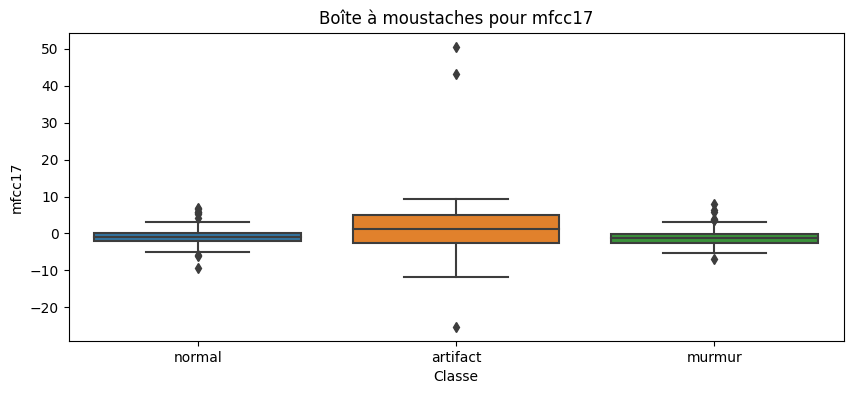

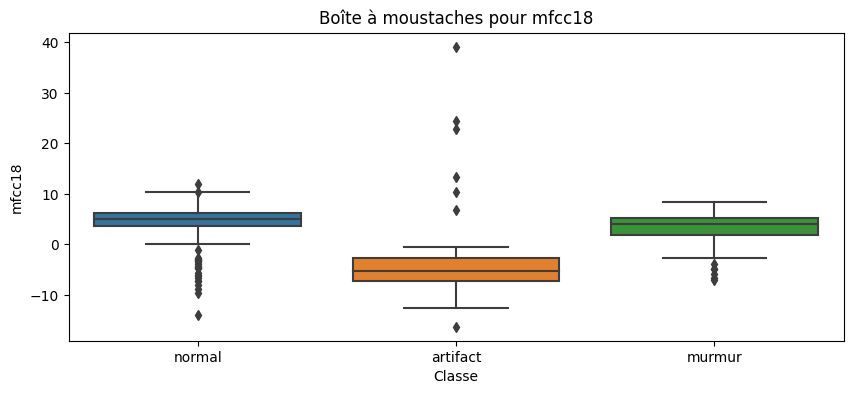

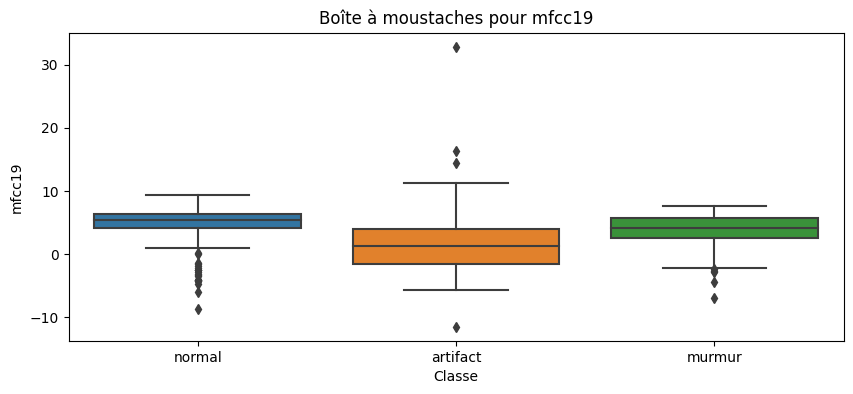

In [ ]:
# Boîtes à moustaches pour chaque coefficient MFCC
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='label', y=feature, data=data)
    plt.title(f'Boîte à moustaches pour {feature}')
    plt.xlabel('Classe')
    plt.ylabel(feature)
    plt.show()

# Méthodes d'apprentissage supervisé

Appliquer au moins 3 méthodes d'apprentissage supervisé et faire une étude sur les paramètres inhérents


# **SVM**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Création du modèle SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Entraînement du modèle SVM
svm_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = svm_model.predict(X_test)

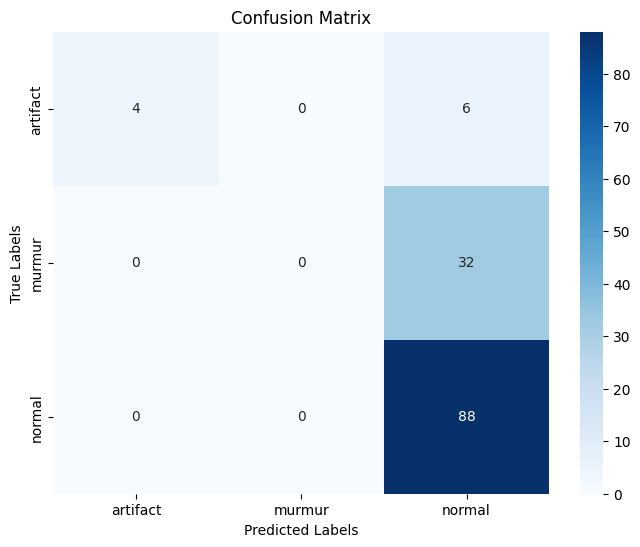

In [ ]:
# Reverse mapping to get labels from indices for plotting
reverse_label_dict = {v: k for k, v in label_dict.items()}

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=[reverse_label_dict[i] for i in range(len(reverse_label_dict))],
            yticklabels=[reverse_label_dict[i] for i in range(len(reverse_label_dict))])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [40]:
def plot_confusion_matrix(y_true, y_pred, label_dict):
    """
    Plots a confusion matrix using seaborn.

    Parameters:
    y_true (array): True labels.
    y_pred (array): Predicted labels.
    label_dict (dict): Dictionary mapping label indices to actual label names.

    Returns:
    None: The function outputs a plot of the confusion matrix.
    """
    # Reverse mapping to get labels from indices for plotting
    reverse_label_dict = {v: k for k, v in label_dict.items()}

    # Calculating the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
                xticklabels=[reverse_label_dict[i] for i in range(len(reverse_label_dict))],
                yticklabels=[reverse_label_dict[i] for i in range(len(reverse_label_dict))])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# **SETA**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def train_svm_and_plot(X_train, y_train, X_test, y_test, label_dict,kernel='rbf', C=1.0, gamma='scale'):
    """
    Trains an SVM model and plots its accuracy and confusion matrix.

    Parameters:
    X_train, y_train: Training data and labels.
    X_test, y_test: Test data and labels.
    kernel (str): Kernel type for SVM.
    C (float): Regularization parameter.
    gamma (str or float): Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

    Returns:
    None: The function plots the accuracy and confusion matrix.
    """
    # Train the SVM model
    svm_model = SVC(kernel=kernel, C=C, gamma=gamma)
    svm_model.fit(X_train, y_train)

    # Predict on test data
    y_pred = svm_model.predict(X_test)

    # Compute and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    plot_confusion_matrix(y_test, y_pred, label_dict)

Accuracy: 0.59


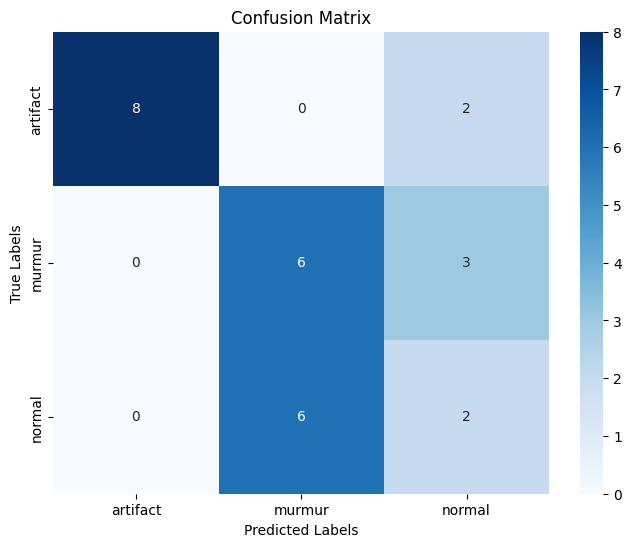

In [ ]:
train_svm_and_plot(XA_train, yA_train, XA_test, yA_test,label_dict, kernel='rbf', C=1.0, gamma='scale')

# **SETB**

Accuracy: 0.77


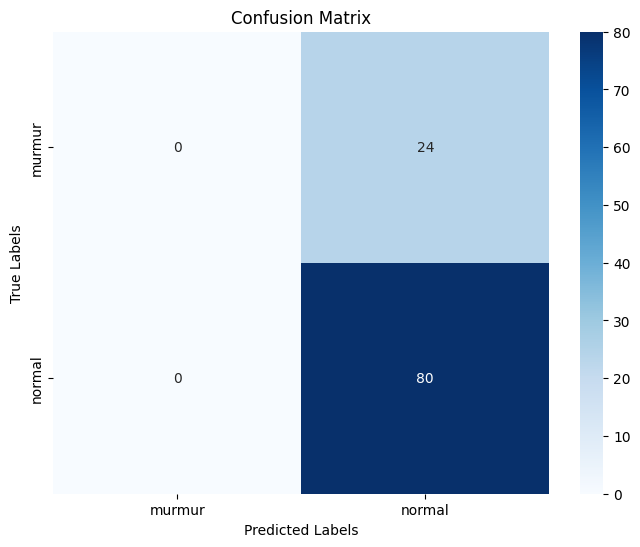

In [ ]:
train_svm_and_plot(XB_train, yB_train, XB_test, yB_test,label_dictB, kernel='rbf', C=1.0, gamma='scale')

# **Playing with parameters**

playing with c parameter

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt

def svm_param_analysis(X_train, y_train, X_test, y_test, param_values, param_name='C'):
    """
    Trains SVM models with varying parameter values and plots precision and accuracy.

    Parameters:
    X_train, y_train, X_test, y_test: Training and testing data.
    param_values (list): List of values for the SVM parameter to analyze.
    param_name (str): Name of the SVM parameter to vary ('C' or 'gamma').

    Returns:
    None: The function plots the performance metrics.
    """
    accuracies = []
    precisions = []

    for value in param_values:
        # Create and train the SVM model with the specified parameter
        if param_name == 'C':
            model = SVC(kernel='rbf', C=value, gamma='scale')
        elif param_name == 'gamma':
            model = SVC(kernel='rbf', C=1.0, gamma=value)
        else:
            raise ValueError("Invalid parameter name. Choose 'C' or 'gamma'.")

        model.fit(X_train, y_train)

        # Make predictions and calculate performance metrics
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='macro'))

    # Plotting the results
    plt.figure(figsize=(10, 5))
    plt.plot(param_values, accuracies, label='Accuracy')
    plt.plot(param_values, precisions, label='Precision')
    plt.xlabel(param_name)
    plt.ylabel('Performance')
    plt.title(f'SVM Performance with Varying {param_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

PLaying with gamma and c

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score

def plot_svm_gamma_c_performance_grid(X_train, y_train, X_test, y_test, gammas, c_range=(0.1, 10), num_c_values=10):
    """
    Plots a 3x3 grid of SVM performance graphs for each gamma value over a range of C values.

    Parameters:
    X_train, y_train: Training data and labels.
    X_test, y_test: Test data and labels.
    gammas (list): List of gamma values to test.
    c_range (tuple): Tuple indicating the range of C values (min, max).
    num_c_values (int): Number of C values to test within the range.

    Returns:
    None: The function plots a grid of performance graphs.
    """
    c_values = np.logspace(np.log10(c_range[0]), np.log10(c_range[1]), num=num_c_values)
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Adjust the size as needed for your report
    axes = axes.ravel()

    for i, gamma in enumerate(gammas):
        accuracies = []
        precisions = []

        for C in c_values:
            model = SVC(kernel='rbf', C=C, gamma=gamma)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracies.append(accuracy_score(y_test, y_pred))
            precisions.append(precision_score(y_test, y_pred, average='macro'))

        ax = axes[i]
        ax.plot(c_values, accuracies, label='Accuracy', marker='o')
        ax.plot(c_values, precisions, label='Precision', marker='x')
        ax.set_xscale('log')
        ax.set_title(f'Gamma = {gamma}')
        ax.set_xlabel('C Value')
        ax.set_ylabel('Performance')
        ax.grid(True)
        ax.legend()

    # Hide any unused subplots
    for j in range(i + 1, 9):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

SET

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


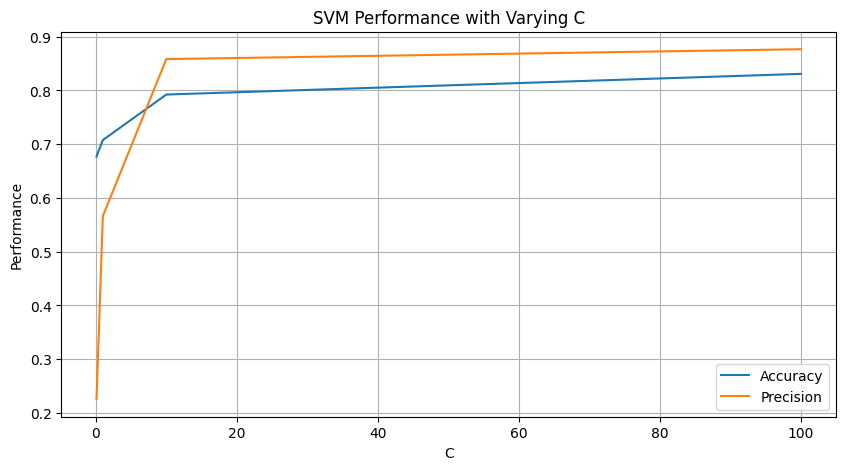

In [ ]:
svm_param_analysis(X_train, y_train, X_test, y_test, param_values=[0.1, 1, 10, 100], param_name='C')

Accuracy: 0.83


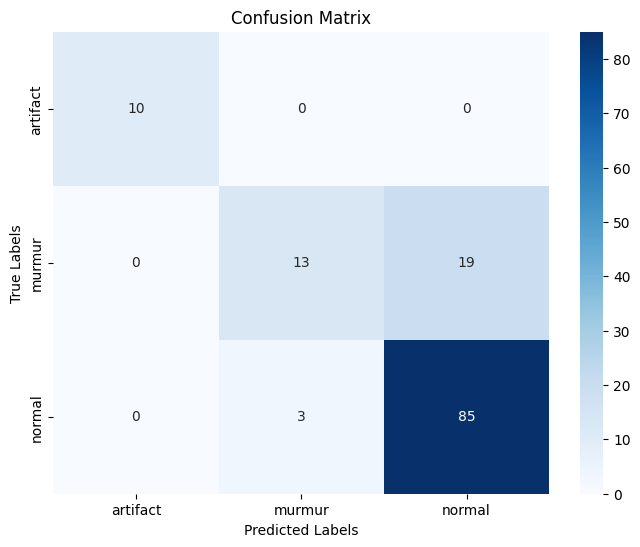

In [ ]:
train_svm_and_plot(X_train, y_train, X_test, y_test, kernel='rbf', C=100, gamma='scale')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

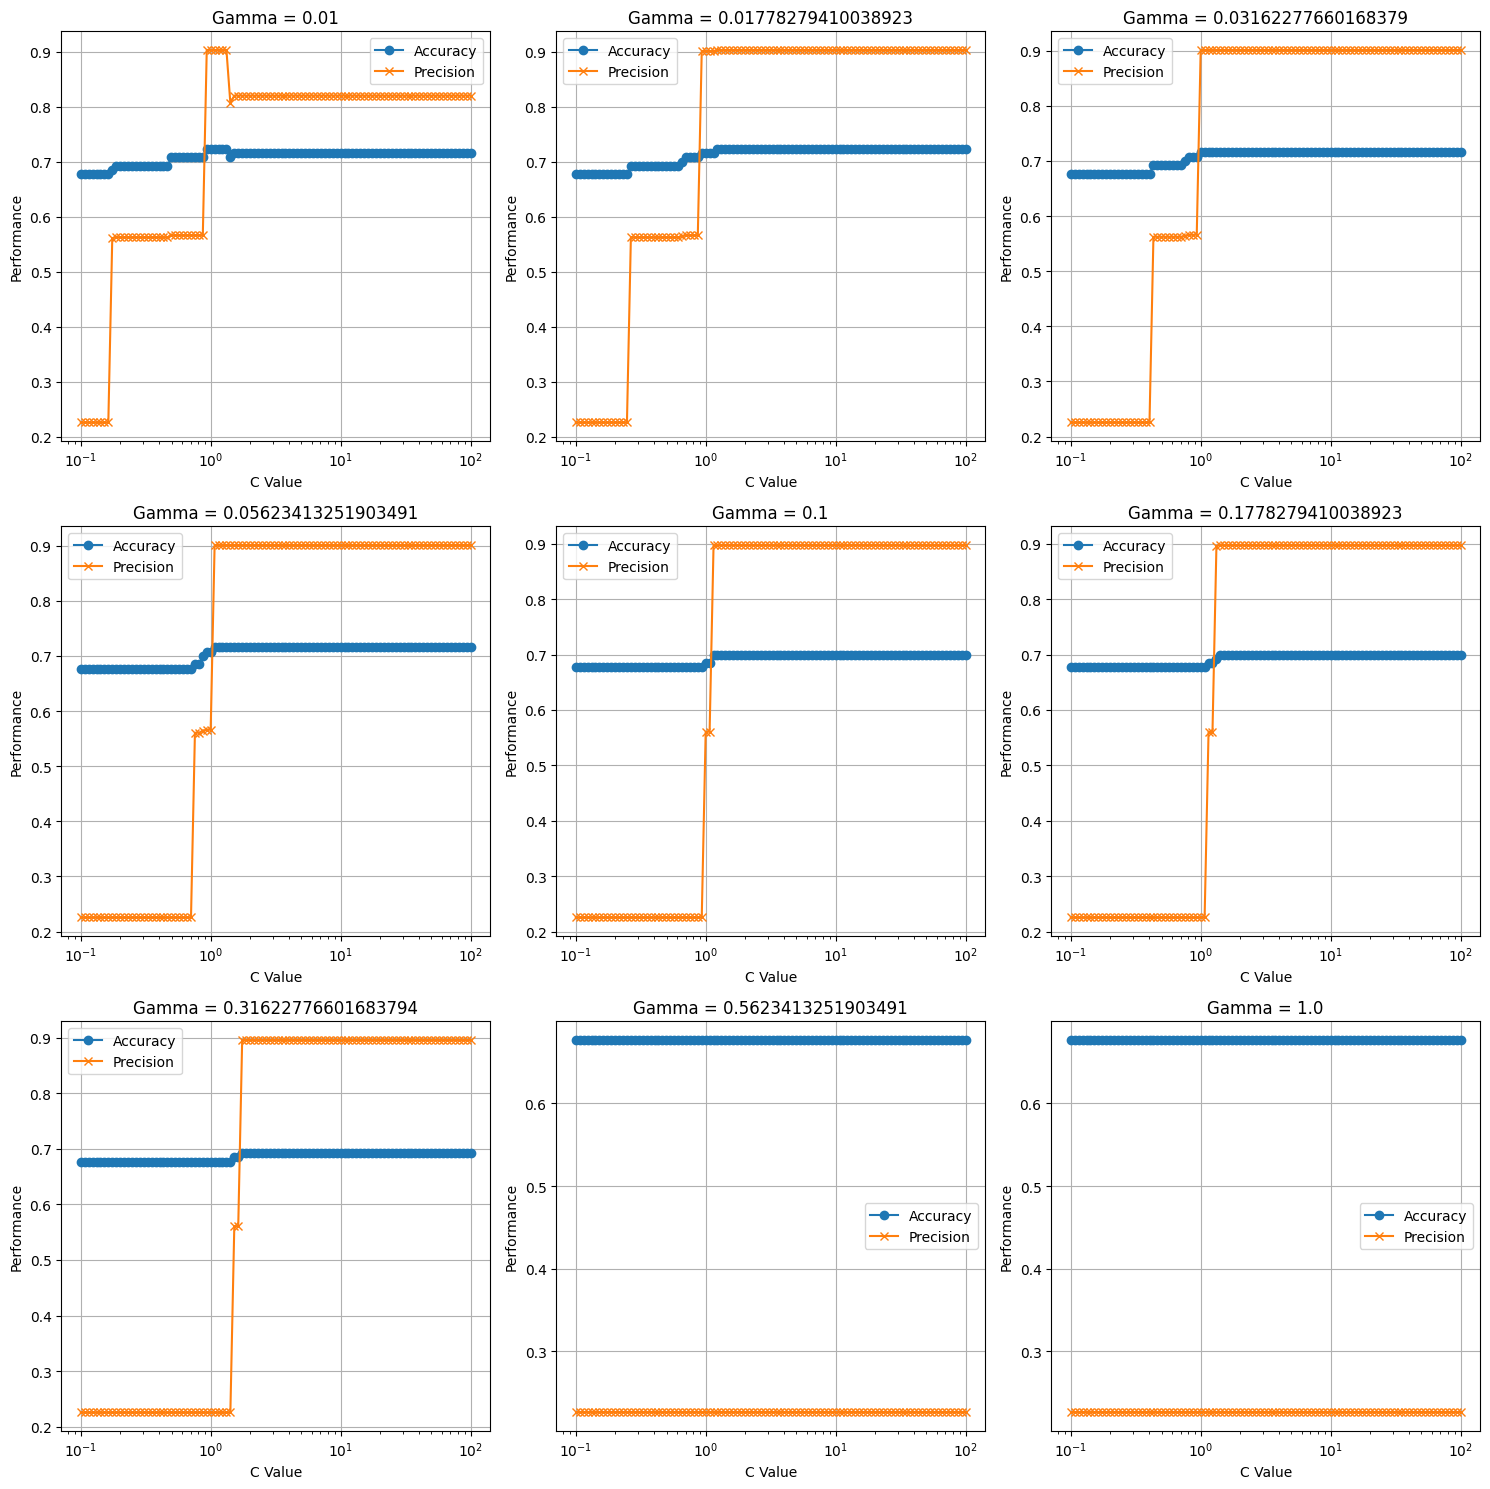

In [ ]:
plot_svm_gamma_c_performance_grid(X_train, y_train, X_test, y_test, gammas=np.logspace(-2, 0, 9), c_range=(0.1, 100), num_c_values=100)

# **SETA**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


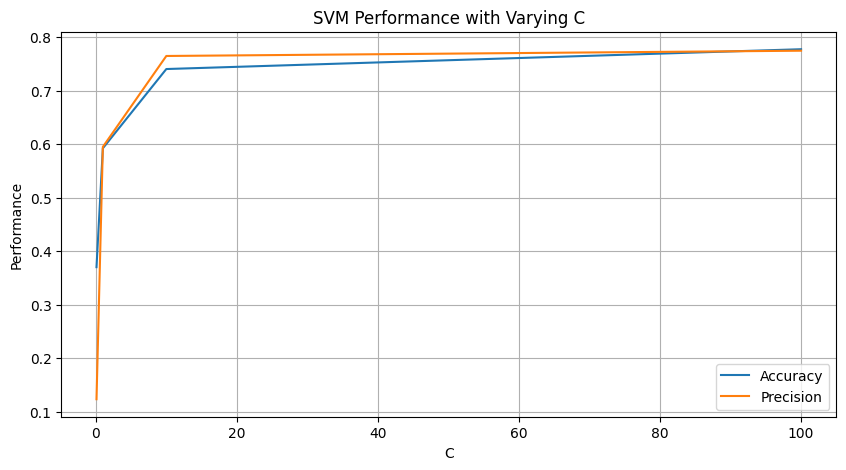

In [ ]:
svm_param_analysis(XA_train, yA_train, XA_test, yA_test, param_values=[0.1, 1, 10, 100], param_name='C')

Accuracy: 0.78


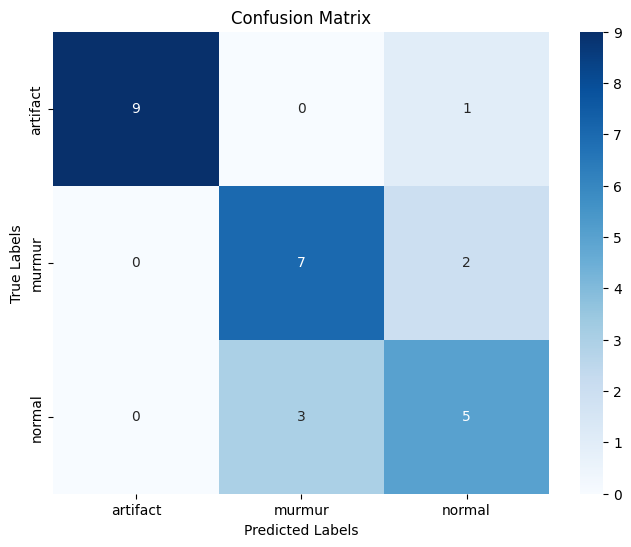

In [ ]:
train_svm_and_plot(XA_train, yA_train, XA_test, yA_test, kernel='rbf', C=100, gamma='scale')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

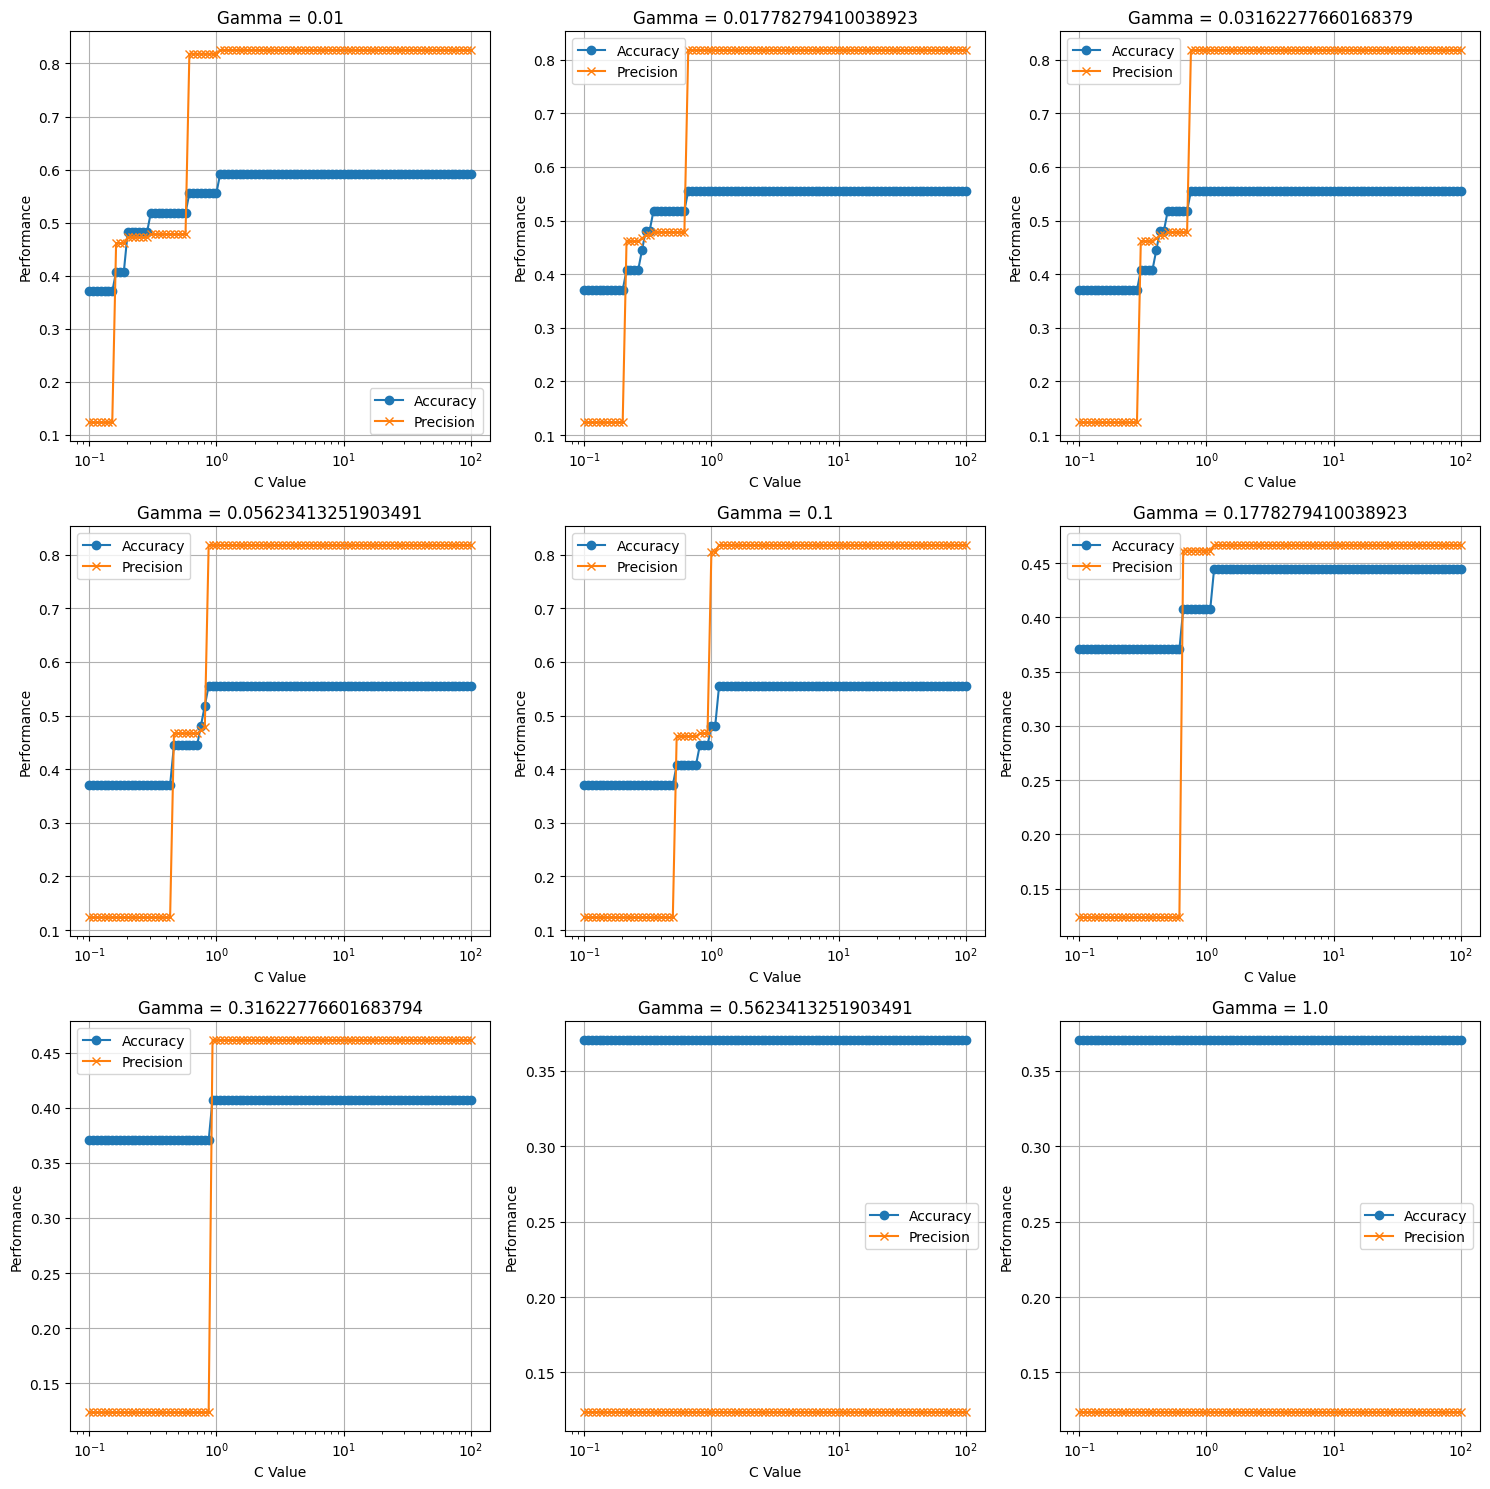

In [ ]:
plot_svm_gamma_c_performance_grid(XA_train, yA_train, XA_test, yA_test, gammas=np.logspace(-2, 0, 9), c_range=(0.1, 100), num_c_values=100)

# **SETB**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


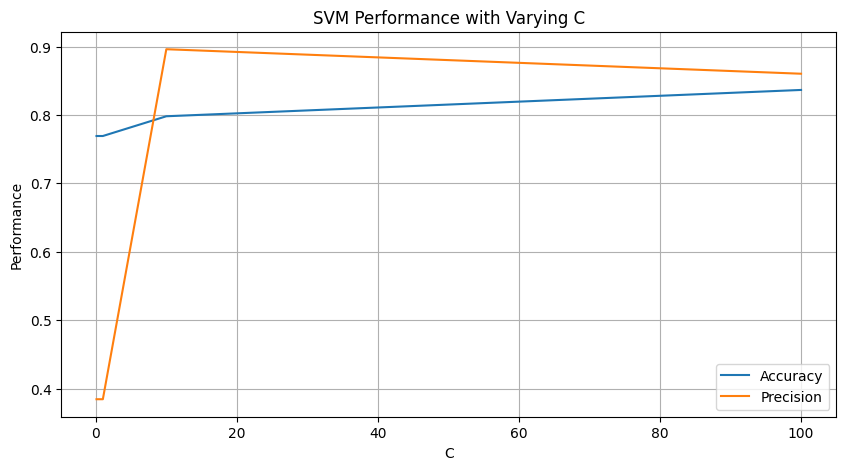

In [ ]:
svm_param_analysis(XB_train, yB_train, XB_test, yB_test, param_values=[0.1, 1, 10, 100], param_name='C')

Accuracy: 0.84


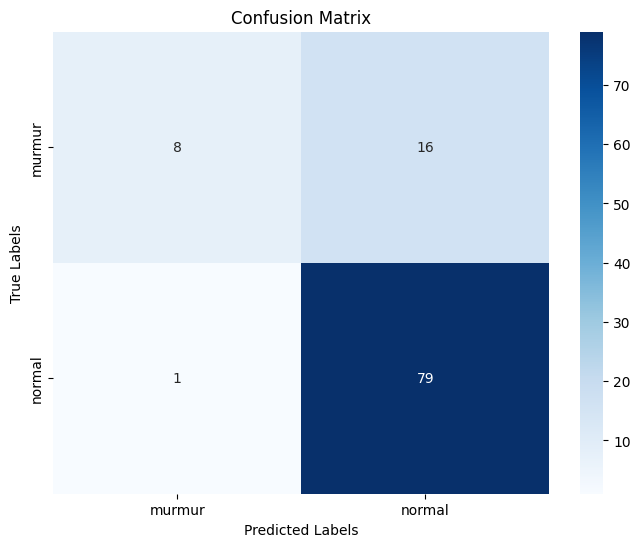

In [ ]:
train_svm_and_plot(XB_train, yB_train, XB_test, yB_test,label_dictB, kernel='rbf', C=100, gamma='scale')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

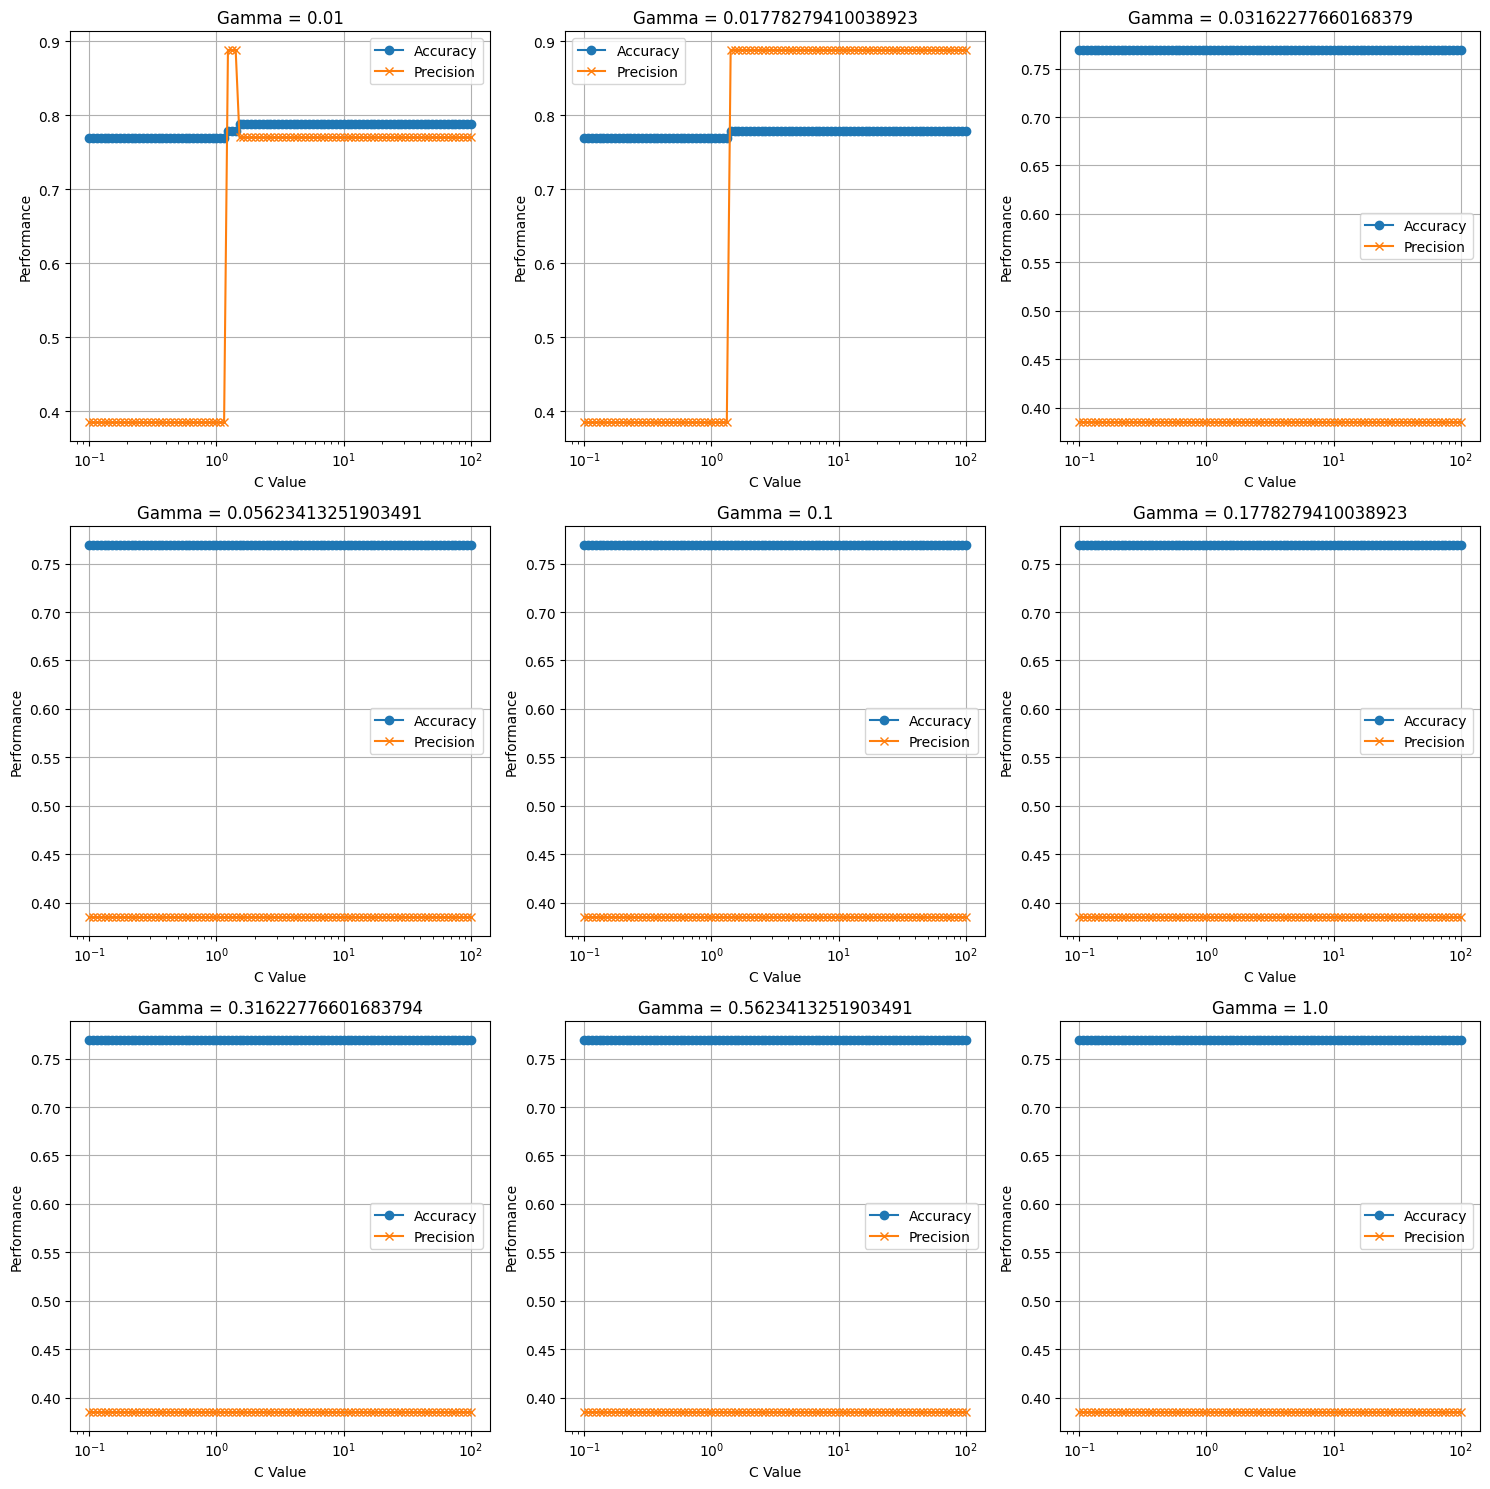

In [ ]:
plot_svm_gamma_c_performance_grid(XB_train, yB_train, XB_test, yB_test, gammas=np.logspace(-2, 0, 9), c_range=(0.1, 100), num_c_values=100)

# **Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined

# Création du modèle Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle sur les données d'entraînement
rf_classifier.fit(X_train, y_train)

# Prédiction des étiquettes sur l'ensemble de test
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Calcul et affichage de l'accuracy et la précision
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' to handle class imbalance
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')

Accuracy: 79.23%
Precision: 81.73%


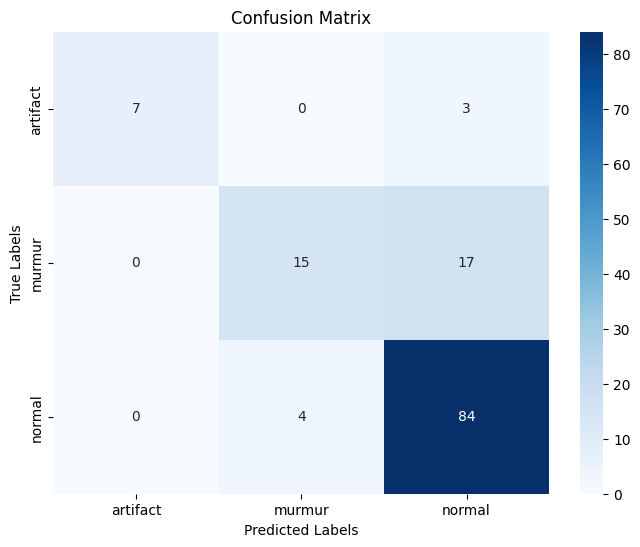

In [ ]:
plot_confusion_matrix(y_test, y_pred, label_dict)


 La classe 1 a été correctement prédite 16 fois (vrais positifs pour la classe 1).     

 Cependant, il y a aussi 16 occurrences où la classe 1 a été incorrectement prédite comme la classe 2 (faux positifs pour la classe 2 et faux négatifs pour la classe 1).

 Cela signifie que chaque fois que le modèle a prédit la classe 1, il y avait une chance égale que la classification soit correcte ou qu'elle aurait dû être classée comme la classe 2.

**Changement de parametres**



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined

# Création du modèle Random Forest
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Entraînement du modèle sur les données d'entraînement
rf_classifier.fit(X_train, y_train)

# Prédiction des étiquettes sur l'ensemble de test
y_pred = rf_classifier.predict(X_test)

**SETA**

In [ ]:
# Création du modèle Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle sur les données d'entraînement
rf_classifier.fit(XA_train, yA_train)

# Prédiction des étiquettes sur l'ensemble de test
yA_pred = rf_classifier.predict(XA_test)

In [ ]:
# Calcul et affichage de l'accuracy et la précision
accuracy = accuracy_score(yA_test, yA_pred)
precision = precision_score(yA_test, yA_pred, average='macro')  # 'macro' to handle class imbalance
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')

Accuracy: 81.48%
Precision: 83.12%


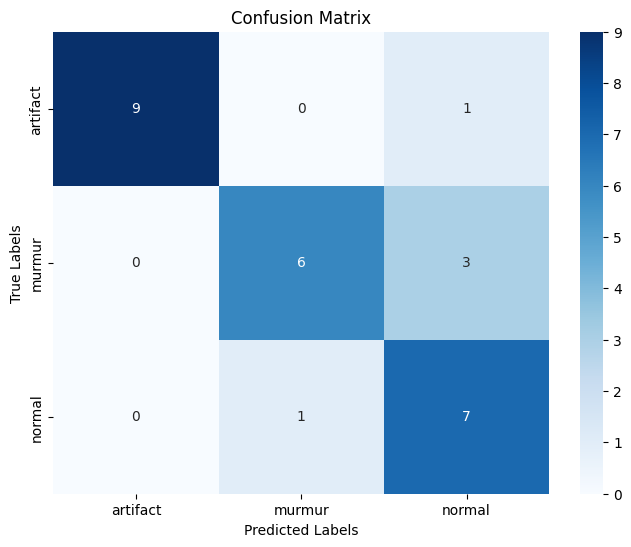

In [ ]:
plot_confusion_matrix(yA_test, yA_pred, label_dictA)

# **SETB**

In [ ]:
# Entraînement du modèle sur les données d'entraînement
rf_classifier.fit(XB_train, yB_train)

# Prédiction des étiquettes sur l'ensemble de test
yB_pred = rf_classifier.predict(XB_test)

In [ ]:
# Calcul et affichage de l'accuracy et la précision
accuracy = accuracy_score(yB_test, yB_pred)
precision = precision_score(yB_test, yB_pred, average='macro')  # 'macro' to handle class imbalance
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')

Accuracy: 78.85%
Precision: 69.68%


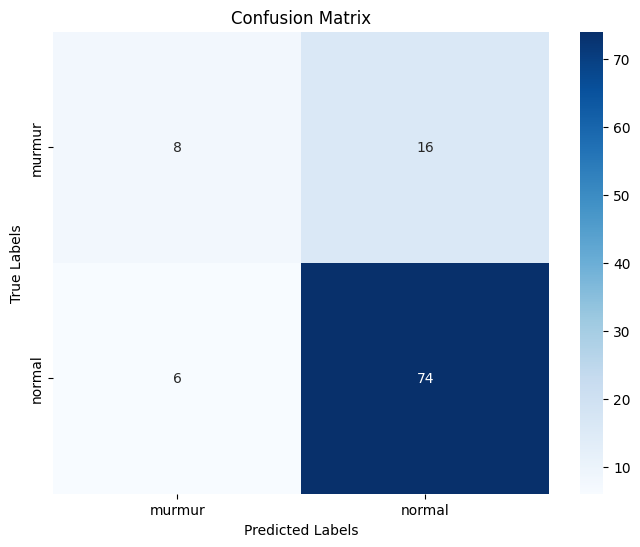

In [ ]:
plot_confusion_matrix(yB_test, yB_pred, label_dictB)

# **Playing with parameters**

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt
import numpy as np

# This is a placeholder function since we do not have the actual training and test data
def evaluate_random_forest(X_train, y_train, X_test, y_test, n_estimators_list, max_depths):
    """
    Evaluates Random Forest classifier with varying n_estimators and max_depth.
    Plots accuracy and precision for each combination of parameters.

    Parameters:
    X_train (array-like): Training features.
    y_train (array-like): Training labels.
    X_test (array-like): Test features.
    y_test (array-like): Test labels.
    n_estimators_list (list of int): List of n_estimators to evaluate.
    max_depths (list of int): List of max_depth values to evaluate.
    """
    # Initialize lists to store accuracies and precisions
    accuracies = np.zeros((len(n_estimators_list), len(max_depths)))
    precisions = np.zeros((len(n_estimators_list), len(max_depths)))

    # Iterate over all combinations of n_estimators and max_depth
    for i, n_estimators in enumerate(n_estimators_list):
        for j, max_depth in enumerate(max_depths):
            # Create and train the Random Forest model
            rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
            rf.fit(X_train, y_train)

            # Make predictions and evaluate
            y_pred = rf.predict(X_test)
            accuracies[i, j] = accuracy_score(y_test, y_pred)
            precisions[i, j] = precision_score(y_test, y_pred, average='macro')

    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # Accuracy plot
    for i, n_estimators in enumerate(n_estimators_list):
        ax[0].plot(max_depths, accuracies[i, :], marker='o', label=f'n_estimators={n_estimators}')
    ax[0].set_title('Random Forest Accuracy by n_estimators and max_depth')
    ax[0].set_xlabel('max_depth')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()
    ax[0].grid(True)

    # Precision plot
    for i, n_estimators in enumerate(n_estimators_list):
        ax[1].plot(max_depths, precisions[i, :], marker='o', label=f'n_estimators={n_estimators}')
    ax[1].set_title('Random Forest Precision by n_estimators and max_depth')
    ax[1].set_xlabel('max_depth')
    ax[1].set_ylabel('Precision')
    ax[1].legend()
    ax[1].grid(True)

    plt.show()

# Parameters to evaluate (this is just an example, adjust to your specific needs)
n_estimators_list = [10, 50, 100]
max_depths = [None,2, 5, 10, 20]

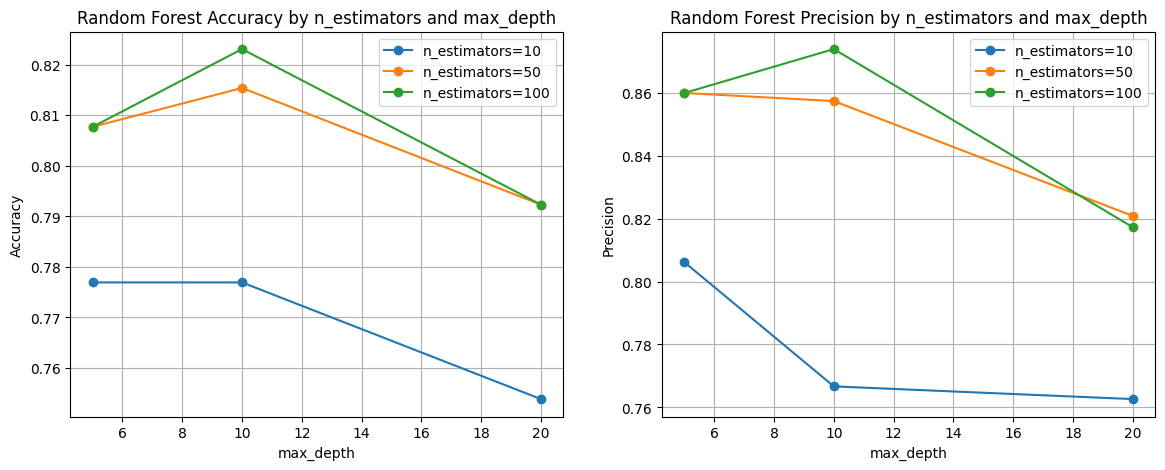

In [ ]:
evaluate_random_forest(X_train, y_train, X_test, y_test, n_estimators_list, max_depths)

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score

def evaluate_rf(X_train, y_train, X_test, y_test,label_dict, n_estimators, max_depth):
    """
    Trains a Random Forest classifier and prints the accuracy and precision.

    Parameters:
    X_train (array-like): Training features.
    y_train (array-like): Training labels.
    X_test (array-like): Test features.
    y_test (array-like): Test labels.
    n_estimators (int): The number of trees in the forest.
    max_depth (int): The maximum depth of the tree.
    """
    # Create the Random Forest model
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

    # Train the model on the training data
    rf_classifier.fit(X_train, y_train)

    # Predict labels on the test set
    y_pred = rf_classifier.predict(X_test)

    # Calculate and display accuracy and precision
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  # 'macro' to handle class imbalance
    print(f'Accuracy: {accuracy*100:.2f}%')
    print(f'Precision: {precision*100:.2f}%')
    plot_confusion_matrix(y_test, y_pred, label_dict)

Accuracy: 82.31%
Precision: 80.56%


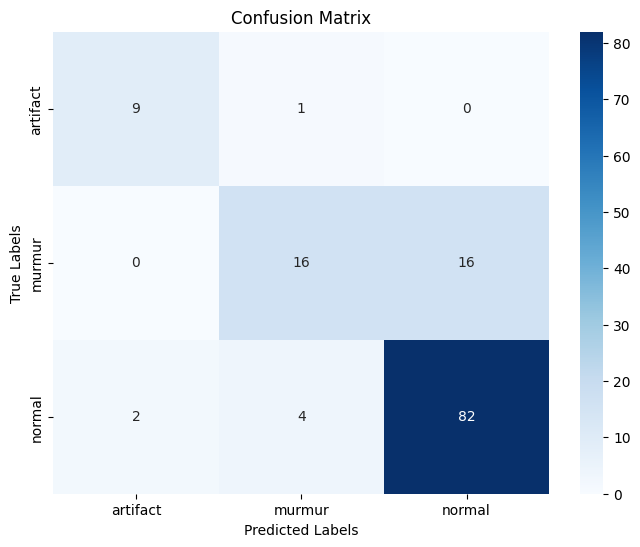

In [41]:
evaluate_rf(X_train, y_train, X_test, y_test,label_dict, n_estimators=100, max_depth=None)

Accuracy: 81.54%
Precision: 79.88%


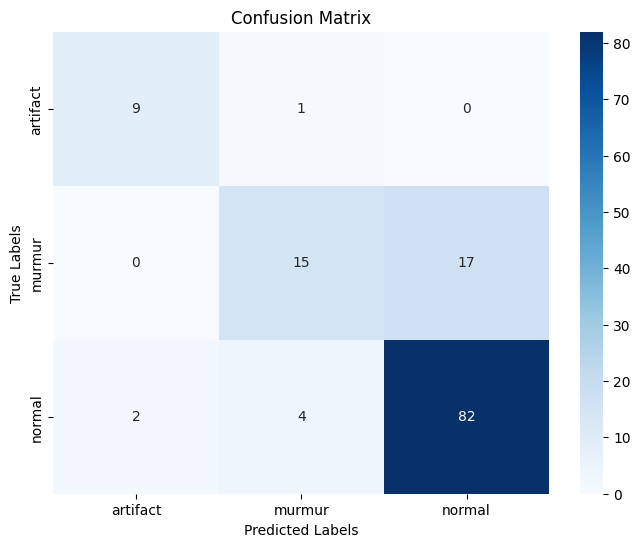

In [42]:
evaluate_rf(X_train, y_train, X_test, y_test,label_dict, n_estimators=100, max_depth=10)

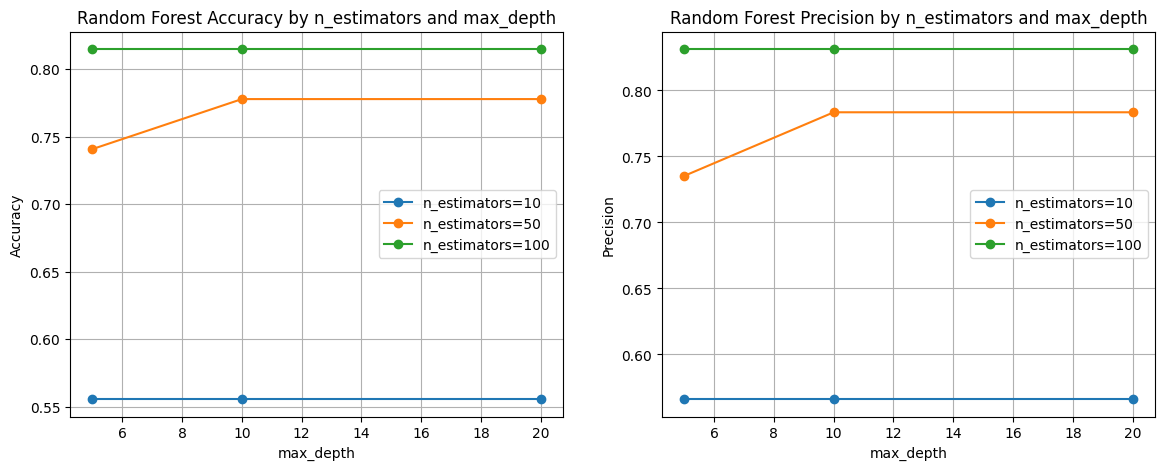

In [ ]:
evaluate_random_forest(XA_train, yA_train, XA_test, yA_test, n_estimators_list, max_depths)

Accuracy: 81.48%
Precision: 83.12%


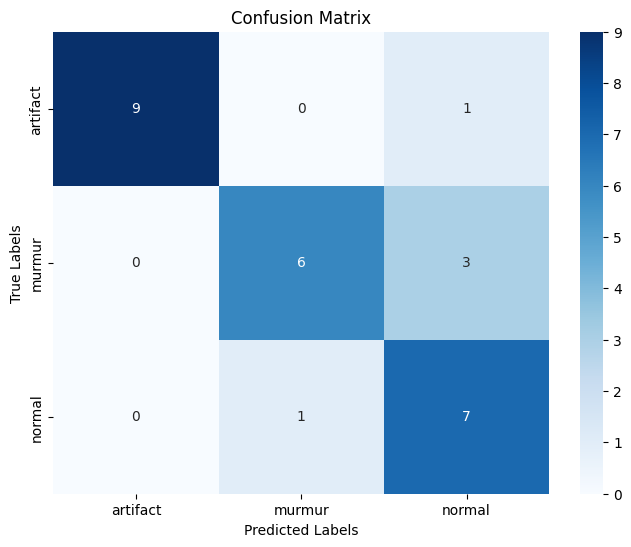

In [43]:
evaluate_rf(XA_train, yA_train, XA_test, yA_test,label_dict, n_estimators=100, max_depth=10)

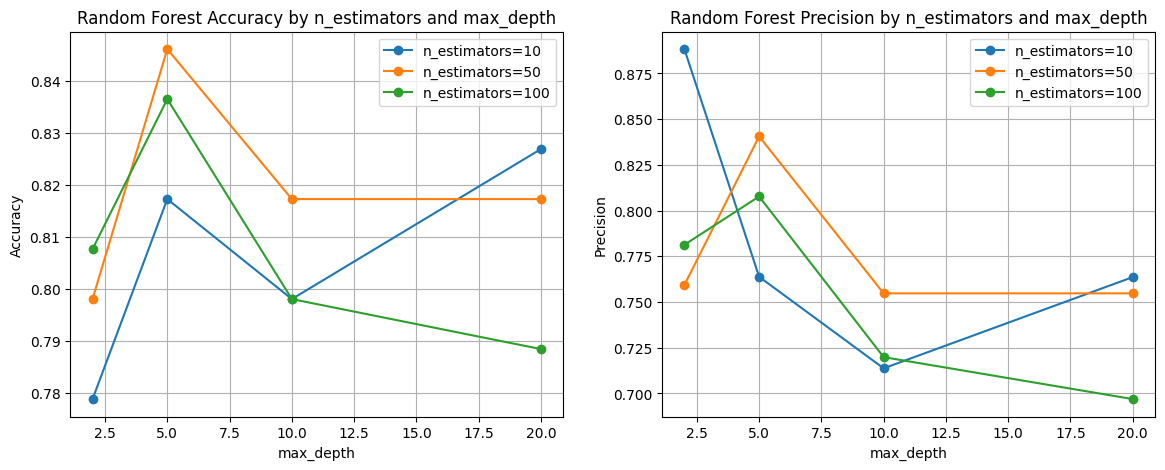

In [ ]:
evaluate_random_forest(XB_train, yB_train, XB_test, yB_test, n_estimators_list, max_depths)

Accuracy: 83.65%
Precision: 80.77%


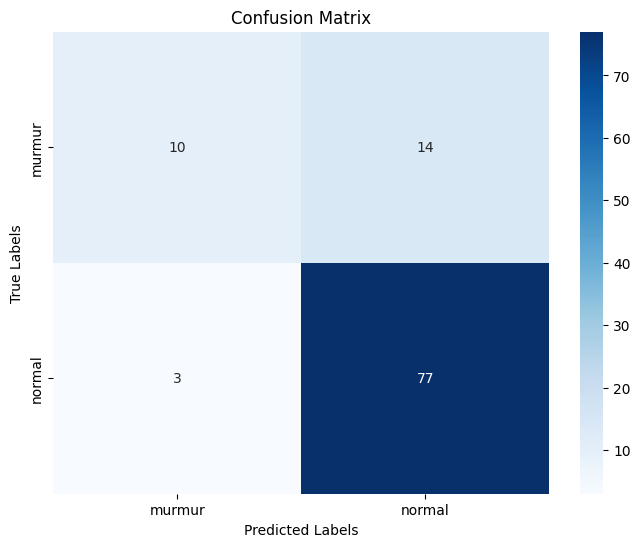

In [44]:
evaluate_rf(XB_train, yB_train, XB_test, yB_test,label_dictB, n_estimators=100, max_depth=5)

Accuracy: 84.62%
Precision: 84.06%


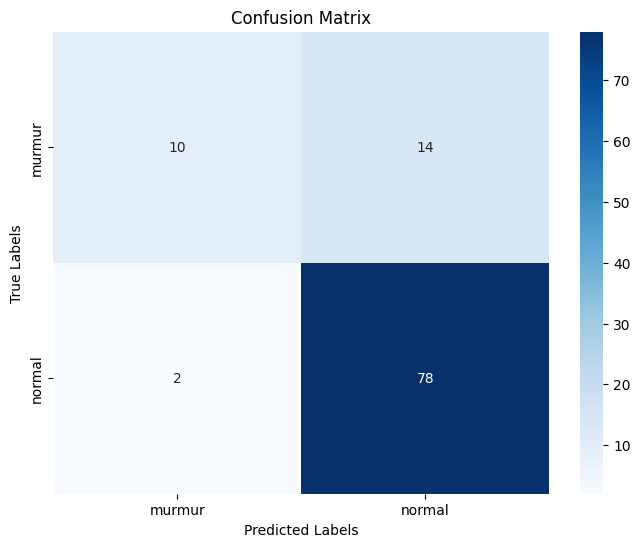

In [45]:
evaluate_rf(XB_train, yB_train, XB_test, yB_test,label_dictB, n_estimators=50, max_depth=5)

Accuracy: 80.77%
Precision: 73.81%


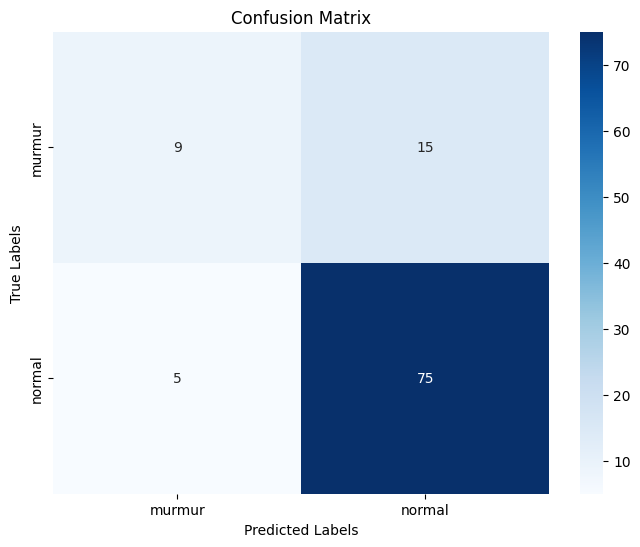

In [46]:
evaluate_rf(XB_train, yB_train, XB_test, yB_test,label_dictB, n_estimators=100, max_depth=8)

# **K-ppv**

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np

def knn_classification(X_train, y_train, X_test, y_test,label_dict, n_neighbors=5):
    """
    Trains a KNN classifier and prints the classification report.

    Parameters:
    X_train (DataFrame or ndarray): Training feature data.
    y_train (DataFrame or ndarray): Training labels.
    X_test (DataFrame or ndarray): Test feature data.
    y_test (DataFrame or ndarray): Test labels.
    n_neighbors (int): Number of neighbors to use for KNN.

    Returns:
    None: The function prints the classification report.
    """
    # Check if y_train and y_test are one-hot encoded and convert them if necessary
    if len(y_train.shape) > 1 and y_train.shape[1] > 1:
        y_train = np.argmax(y_train, axis=1)
        y_test = np.argmax(y_test, axis=1)

    # Create and train the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Print the classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, label_dict)


Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.67      0.50      0.57        32
           2       0.83      0.86      0.84        88

    accuracy                           0.78       130
   macro avg       0.74      0.79      0.75       130
weighted avg       0.78      0.78      0.78       130



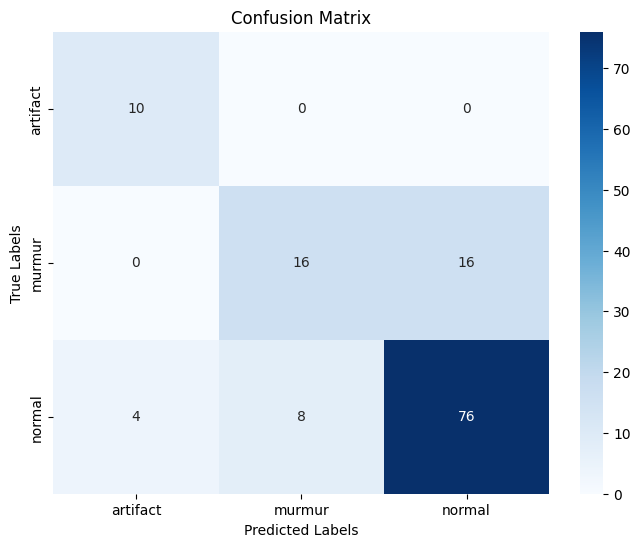

In [51]:
knn_classification(X_train, y_train, X_test, y_test,label_dict, n_neighbors=5)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.71      0.38      0.49        32
           2       0.76      0.94      0.84        88

    accuracy                           0.76       130
   macro avg       0.82      0.57      0.63       130
weighted avg       0.77      0.76      0.73       130



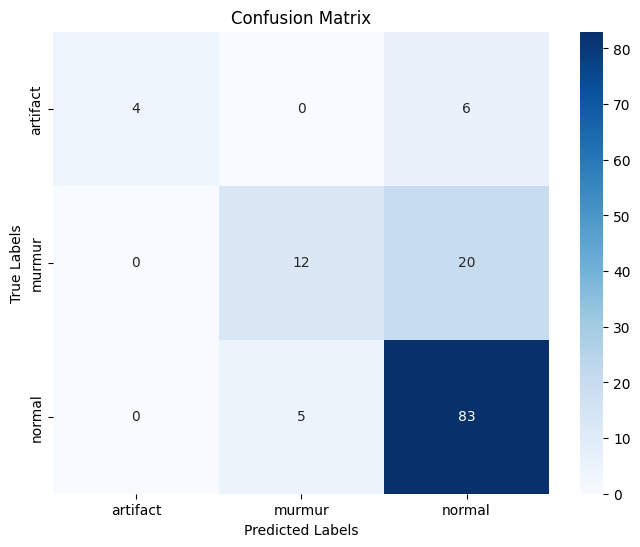

In [ ]:
knn_classification(X_train, y_train, X_test, y_test, n_neighbors=10)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score
import numpy as np

def plot_knn_performance(X_train, y_train, X_test, y_test, max_neighbors):
    """
    Trains KNN classifiers with a range of neighbors, and plots accuracy and precision.

    Parameters:
    X_train (DataFrame or ndarray): Training feature data.
    y_train (DataFrame or ndarray): Training labels.
    X_test (DataFrame or ndarray): Test feature data.
    y_test (DataFrame or ndarray): Test labels.
    max_neighbors (int): The maximum number of neighbors to test.

    Returns:
    None: The function plots the performance metrics.
    """
    accuracies = []
    precisions = []
    neighbor_values = range(1, max_neighbors + 1)

    for n in neighbor_values:
        # Create and train the KNN classifier
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)

        # Make predictions
        y_pred = knn.predict(X_test)

        # Calculate metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='macro'))

    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(neighbor_values, accuracies, label='Accuracy')
    plt.plot(neighbor_values, precisions, label='Precision')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Performance')
    plt.title('KNN Performance: Accuracy and Precision vs Number of Neighbors')
    plt.legend()
    plt.grid(True)
    plt.show()

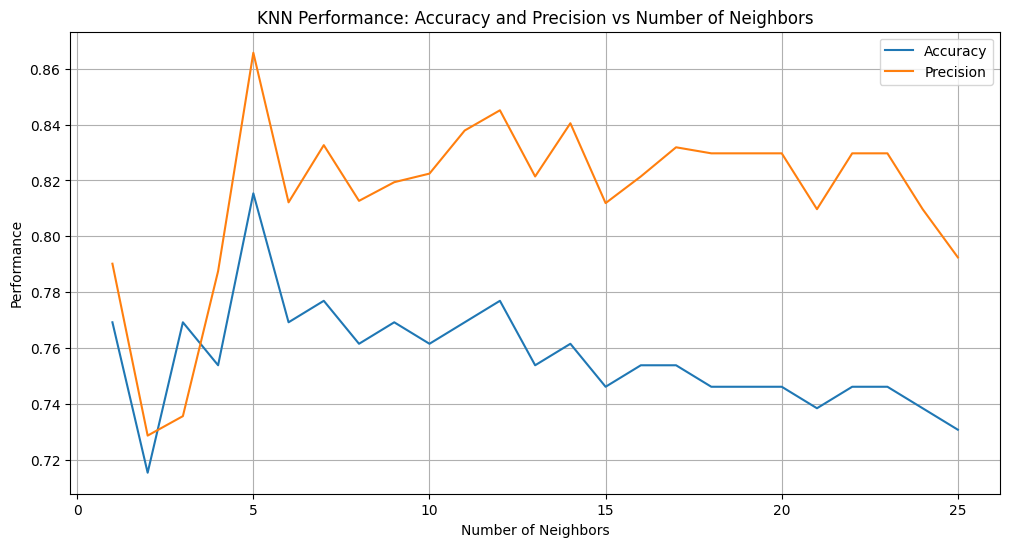

In [ ]:
plot_knn_performance(X_train, y_train, X_test, y_test, max_neighbors=25)


Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.67      0.50      0.57        32
           2       0.83      0.86      0.84        88

    accuracy                           0.78       130
   macro avg       0.74      0.79      0.75       130
weighted avg       0.78      0.78      0.78       130



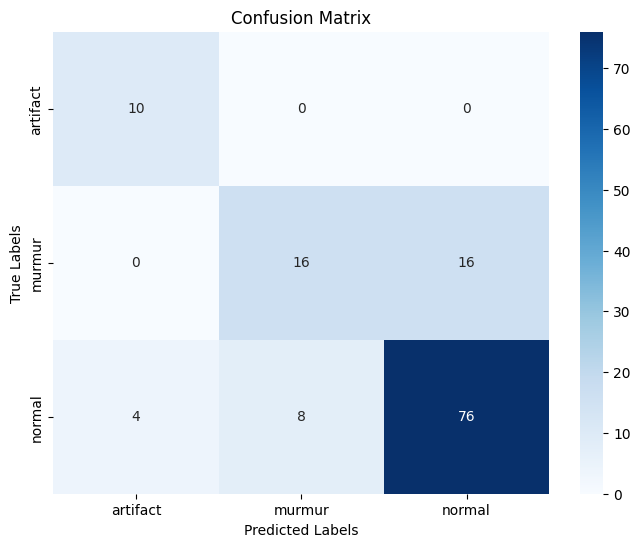

In [49]:
knn_classification(X_train, y_train, X_test, y_test, n_neighbors=5)

# **SETA**

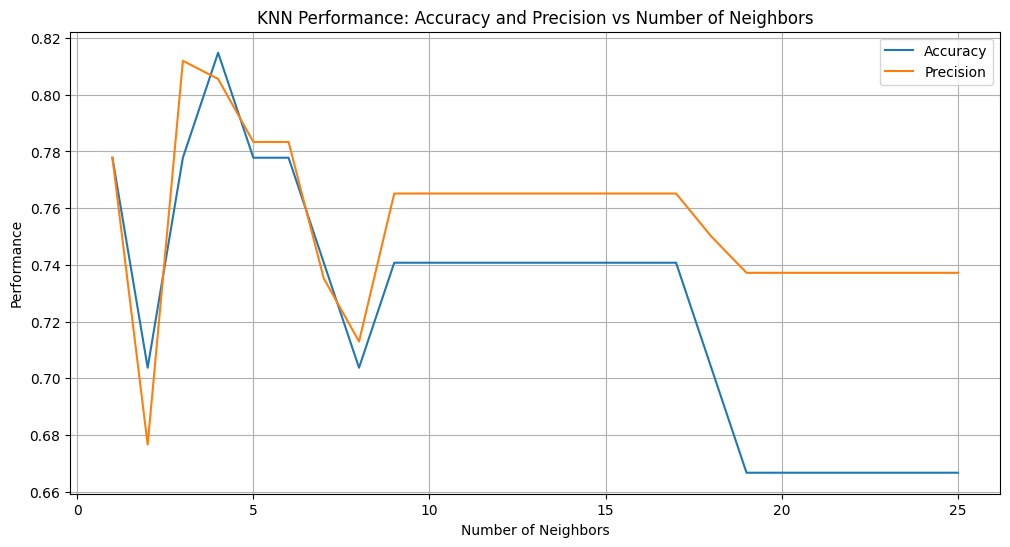

In [ ]:
plot_knn_performance(XA_train, yA_train, XA_test, yA_test, max_neighbors=25)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      0.67      0.71         9
           2       0.67      0.75      0.71         8

    accuracy                           0.81        27
   macro avg       0.81      0.81      0.80        27
weighted avg       0.82      0.81      0.81        27



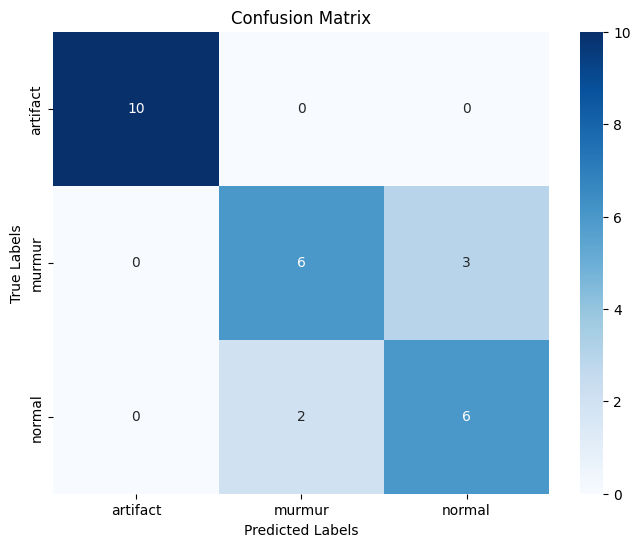

In [52]:
knn_classification(XA_train, yA_train, XA_test, yA_test,label_dict, n_neighbors=4)

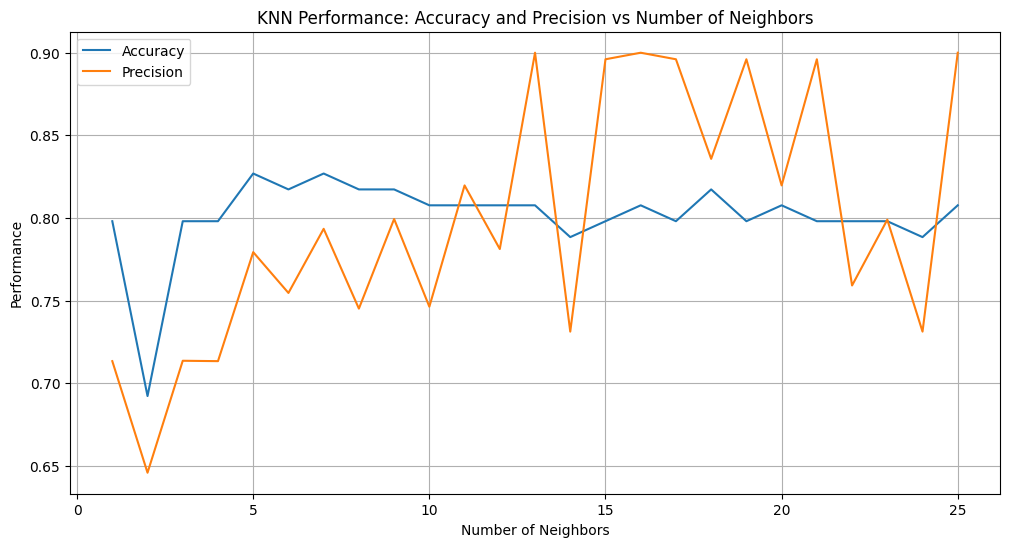

In [ ]:
plot_knn_performance(XB_train, yB_train, XB_test, yB_test, max_neighbors=25)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29        24
           1       0.80      1.00      0.89        80

    accuracy                           0.81       104
   macro avg       0.90      0.58      0.59       104
weighted avg       0.85      0.81      0.75       104



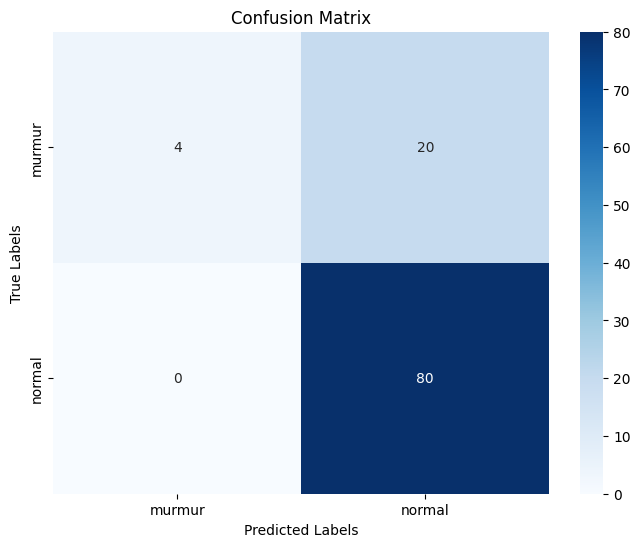

In [53]:
knn_classification(XB_train, yB_train, XB_test, yB_test,label_dictB, n_neighbors=16)


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.42      0.53        24
           1       0.84      0.95      0.89        80

    accuracy                           0.83       104
   macro avg       0.78      0.68      0.71       104
weighted avg       0.81      0.83      0.81       104



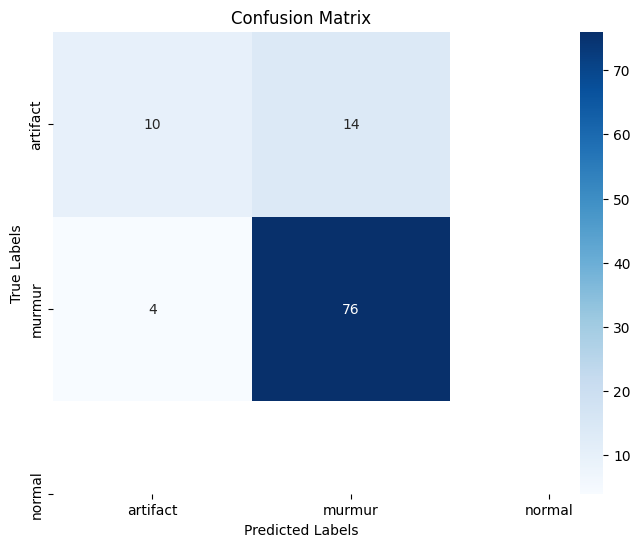

In [ ]:
knn_classification(XB_train, yB_train, XB_test, yB_test, n_neighbors=5)


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.38      0.50        24
           1       0.84      0.96      0.90        80

    accuracy                           0.83       104
   macro avg       0.79      0.67      0.70       104
weighted avg       0.82      0.83      0.80       104



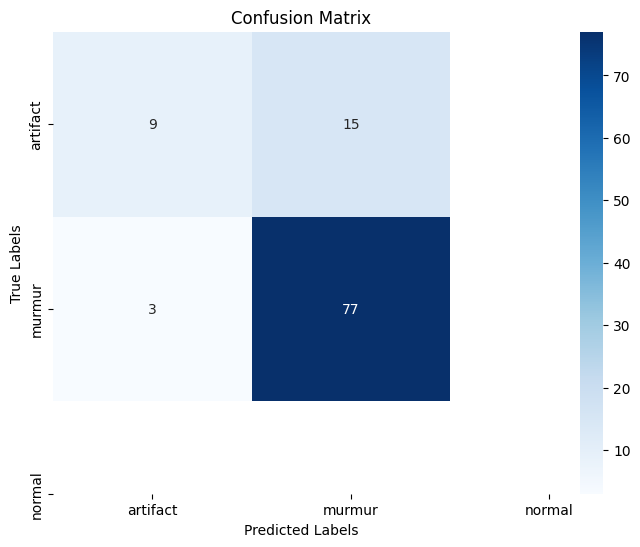

In [ ]:
knn_classification(XB_train, yB_train, XB_test, yB_test, n_neighbors=7)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


# Map encoded labels to your label_dictA
label_dictA = {
    0: "artifact",
    2: "normal",
    1: "murmur"
}

# Map encoded labels to text labels
y = np.array([label_dictA[label] for label in y_encoded])

# Convert labels to one-hot encoding
y = to_categorical(y_encoded)


# Create a neural network model
model = Sequential()
model.add(Dense(64, input_shape=(20,), activation='relu'))  # Input layer with 20 features
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 units
model.add(Dense(len(label_dictA), activation='softmax'))  # Output layer with the number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


In [ ]:
# Train the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Méthode non supervisée


Appliquer au moins une méthode non supervisée

# **Kmeans**

Avec prétraitement :

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns


def apply_pca(X, n_components):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(X)

def plot_3d_scatter(X, c, label, centers=None):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=c, cmap='viridis')
    if centers is not None:
        ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], s=300, c='red', marker='X', label='Centroids')
    ax.set_title(label)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    if centers is not None:
        ax.legend()
    return scatter


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Matrice de confusion :


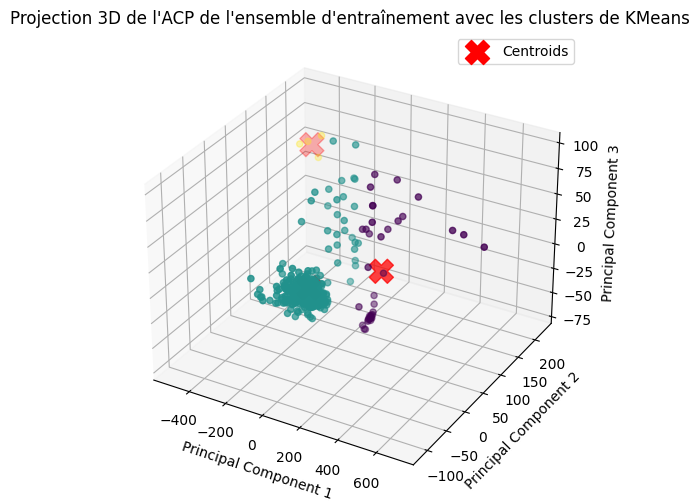

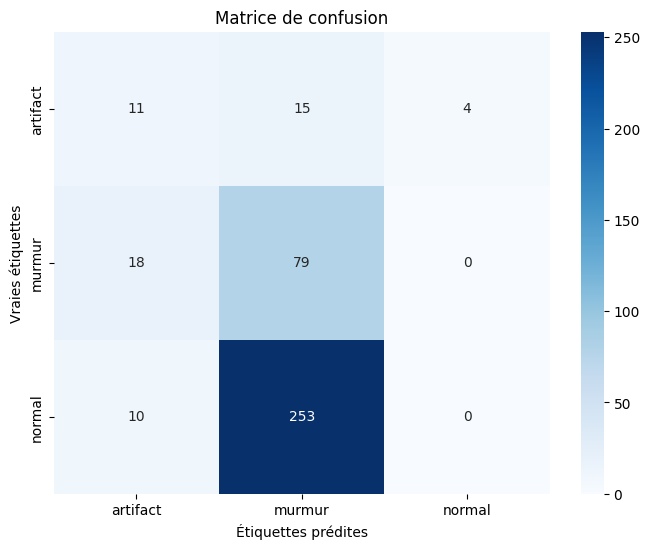


Précision : 23.08%


In [ ]:
# Encoder les étiquettes en entiers pour la cartographie des couleurs
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Appliquer l'ACP pour 3D
X_train_pca_3d = apply_pca(X_train, n_components=3)

# Appliquer la classification KMeans aux données 3D de l'ACP
kmeans = KMeans(n_clusters=len(np.unique(y_train_encoded)), random_state=42)
y_train_pred = kmeans.fit_predict(X_train_pca_3d)

# Encoder les étiquettes prédites pour la cartographie des couleurs
y_train_pred_encoded = le.transform(y_train_pred)

# Tracer en 3D avec les clusters de KMeans
scatter_kmeans = plot_3d_scatter(X_train_pca_3d, y_train_pred_encoded, 'Projection 3D de l\'ACP de l\'ensemble d\'entraînement avec les clusters de KMeans', centers=kmeans.cluster_centers_)

# Calculer la matrice de confusion et la précision
conf_matrix = confusion_matrix(y_train_encoded, y_train_pred)
accuracy = accuracy_score(y_train_encoded, y_train_pred)

print("Matrice de confusion :")
# Mappage inverse pour obtenir les étiquettes à partir des indices pour le tracé
reverse_label_dict = {v: k for k, v in label_dict.items()}

# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=[reverse_label_dict[i] for i in range(len(reverse_label_dict))],
            yticklabels=[reverse_label_dict[i] for i in range(len(reverse_label_dict))])
plt.xlabel('Étiquettes prédites')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()
print("\nPrécision : {:.2%}".format(accuracy))

plt.show()

# **SETA**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Matrice de confusion :


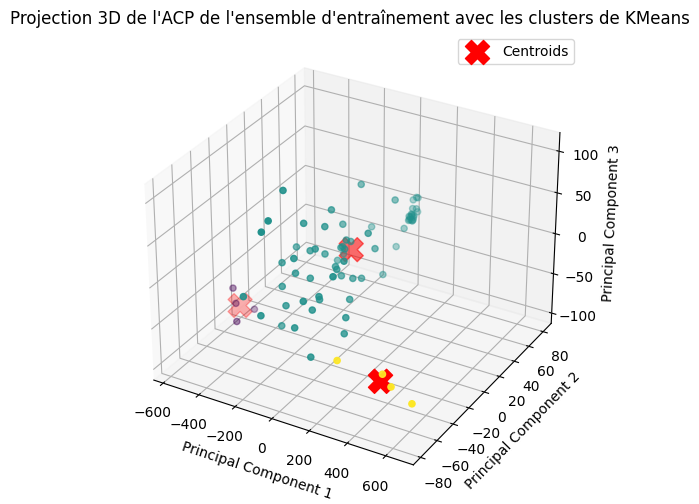

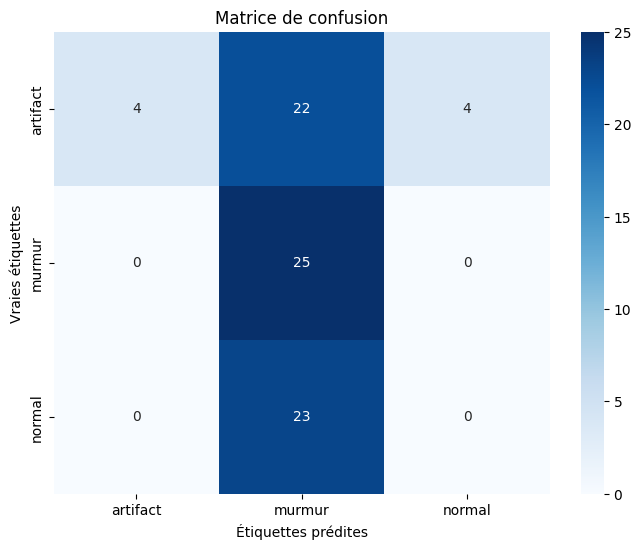


Précision : 37.18%


In [ ]:
# Encoder les étiquettes en entiers pour la cartographie des couleurs
le = LabelEncoder()
yA_train_encoded = le.fit_transform(yA_train)

# Appliquer l'ACP pour 3D
XA_train_pca_3d = apply_pca(XA_train, n_components=3)

# Appliquer la classification KMeans aux données 3D de l'ACP
kmeans = KMeans(n_clusters=len(np.unique(yA_train_encoded)), random_state=42)
yA_train_pred = kmeans.fit_predict(XA_train_pca_3d)

# Encoder les étiquettes prédites pour la cartographie des couleurs
yA_train_pred_encoded = le.transform(yA_train_pred)

# Tracer en 3D avec les clusters de KMeans
scatter_kmeans = plot_3d_scatter(XA_train_pca_3d, yA_train_pred_encoded, 'Projection 3D de l\'ACP de l\'ensemble d\'entraînement avec les clusters de KMeans', centers=kmeans.cluster_centers_)

# Calculer la matrice de confusion et la précision
conf_matrix = confusion_matrix(yA_train_encoded, yA_train_pred)
accuracy = accuracy_score(yA_train_encoded, yA_train_pred)

print("Matrice de confusion :")
# Mappage inverse pour obtenir les étiquettes à partir des indices pour le tracé
reverse_label_dict = {v: k for k, v in label_dict.items()}

# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=[reverse_label_dict[i] for i in range(len(reverse_label_dict))],
            yticklabels=[reverse_label_dict[i] for i in range(len(reverse_label_dict))])
plt.xlabel('Étiquettes prédites')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()
print("\nPrécision : {:.2%}".format(accuracy))

plt.show()

# **SETB**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Matrice de confusion :


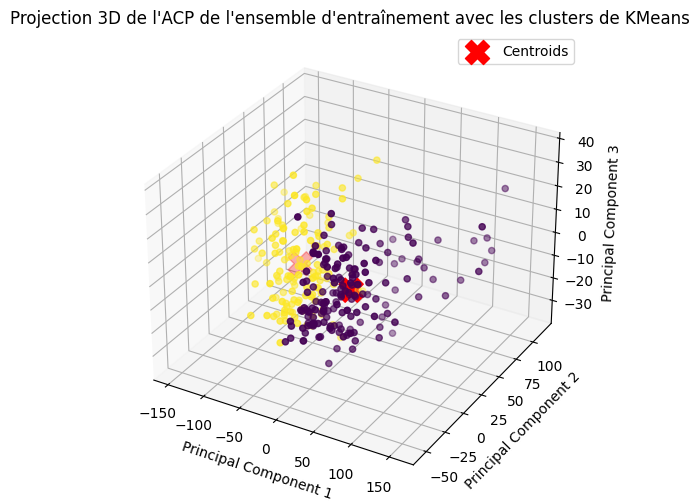

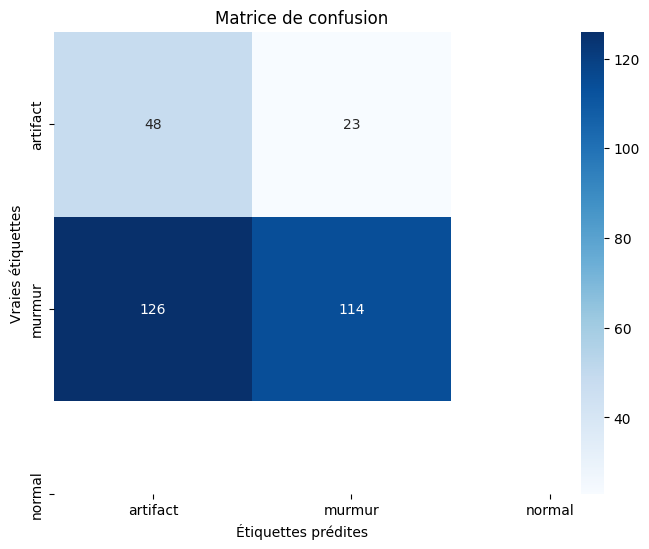


Précision : 52.09%


In [ ]:
# Encoder les étiquettes en entiers pour la cartographie des couleurs
le = LabelEncoder()
yB_train_encoded = le.fit_transform(yB_train)

# Appliquer l'ACP pour 3D
XB_train_pca_3d = apply_pca(XB_train, n_components=3)

# Appliquer la classification KMeans aux données 3D de l'ACP
kmeans = KMeans(n_clusters=len(np.unique(yB_train_encoded)), random_state=42)
yB_train_pred = kmeans.fit_predict(XB_train_pca_3d)

# Encoder les étiquettes prédites pour la cartographie des couleurs
yB_train_pred_encoded = le.transform(yB_train_pred)

# Tracer en 3D avec les clusters de KMeans
scatter_kmeans = plot_3d_scatter(XB_train_pca_3d, yB_train_pred_encoded, 'Projection 3D de l\'ACP de l\'ensemble d\'entraînement avec les clusters de KMeans', centers=kmeans.cluster_centers_)

# Calculer la matrice de confusion et la précision
conf_matrix = confusion_matrix(yB_train_encoded, yB_train_pred)
accuracy = accuracy_score(yB_train_encoded, yB_train_pred)

print("Matrice de confusion :")
# Mappage inverse pour obtenir les étiquettes à partir des indices pour le tracé
reverse_label_dict = {v: k for k, v in label_dict.items()}

# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=[reverse_label_dict[i] for i in range(len(reverse_label_dict))],
            yticklabels=[reverse_label_dict[i] for i in range(len(reverse_label_dict))])
plt.xlabel('Étiquettes prédites')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()
print("\nPrécision : {:.2%}".format(accuracy))

plt.show()

# Votre étude

Réaliser votre propre étude comparative entre les différents battements cardiaques.
- jouer sur les bases d'apprentissage/test, équilibre des classes
- les paramètres inhérents aux méthodes
- l'utilisation de prétraitement ou non

Vous pouvez aussi réaliser une étude comparative entre les jeux de données A (*DataMFCC_SetA.csv*) et B (*DataMFCC_SetB.csv*)
